In [1]:
import pandas as pd
import numpy as np
import tushare as ts
pd.set_option('max_colwidth',200)
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 常用函数基本信息介绍

=====fut_basic 输入参数=====

- exchange	str	Y	交易所代码 

- CFFEX-中金所 (ts_code: CFX)
- DCE-大商所 
- CZCE-郑商所 
- SHFE-上期所 
- INE-上海国际能源交易中心

fut_type	str	N	合约类型 

(1 普通合约 2主力与连续合约 默认取全部)

=====fut_basic 输出参数=====

- 名称	类型	默认显示	描述
- ts_code	str	Y	合约代码

- symbol	str	Y	交易标识
- exchange	str	Y	交易市场
- name	str	Y	中文简称
- fut_code	str	Y	合约产品代码
- multiplier	float	Y	合约乘数
- trade_unit	str	Y	交易计量单位
- per_unit	float	Y	交易单位(每手)
- quote_unit	str	Y	报价单位
- quote_unit_desc	str	Y	最小报价单位说明
- d_mode_desc	str	Y	交割方式说明
- list_date	str	Y	上市日期
- delist_date	str	Y	最后交易日期
- d_month	str	Y	交割月份
- last_ddate	str	Y	最后交割日
- trade_time_desc	str	N	交易时间说明

https://tushare.pro/document/2?doc_id=135

=====fut_settle 输入参数=====

名称	类型	必选	描述

- trade_date	str	N	交易日期 （trade_date/ts_code至少需要输入一个参数）
- ts_code	str	N	合约代码
- start_date	str	N	开始日期
- end_date	str	N	结束日期
- exchange	str	N	交易所代码

=====fut_settle 输出参数=====

名称	类型	默认显示	描述

- ts_code	str	Y	合约代码
- trade_date	str	Y	交易日期
- settle	float	Y	结算价
- trading_fee_rate	float	Y	交易手续费率
- trading_fee	float	Y	交易手续费
- delivery_fee	float	Y	交割手续费
- b_hedging_margin_rate	float	Y	买套保交易保证金率
- s_hedging_margin_rate	float	Y	卖套保交易保证金率
- long_margin_rate	float	Y	买投机交易保证金率
- short_margin_rate	float	Y	卖投机交易保证金率
- offset_today_fee	float	N	平今仓手续率
- exchange	str	N	交易所

https://tushare.pro/document/2?doc_id=141

# 2. Tushare期货数据：

https://tushare.pro/document/2?doc_id=134



- 数据名称	API	描述	需要最低积分	每分钟次数

- 期货合约列表	fut_basic	全部历史	200	80

- 期货交易日历	trade_cal	数据开始月1996年1月，定期更新	0	无限制

- 期货日线行情	fut_daily	数据开始月1996年1月，每日盘后更新	200	120

- 每日成交持仓排名	fut_holding	数据开始月2002年1月，每日盘后更新	600	80

- 仓单日报	fut_wsr	数据开始月2006年1月，每日盘后更新	600	80

- 结算参数	fut_settle	数据开始月2012年1月，每日盘后更新	600	80

=================================

- 主力合约	连续合约	普通合约

- XX	XXL	XXMMDD

- 例如：CU.SHF	例如：CUL.SHF	例如：CU1811.SHF

# 3. 导入/探索数据

In [2]:
# target_contracts = [
#  "TA1909", #1
#  "SR1909", #2
#  "OI909", #3
#  "M1909", #4
#  "AL1909", #5
#  "ZN1909", #6
#  "J1909", #7
#  "BU1912", #8
#  "RB1910", #9
#  "CF1909", #10
#  "HC1910", #11
#  "L1909", #12
#  "RU2001", #13
#  "ZC909", #14
#  "P1909", #15
#  "UR2001", #16
#  "IF1909", #17
#  "IC1909",
#  "IH1909",
#  "UR909"   
# ]

In [2]:
all_exchanges = ["DCE", "CFFEX", "CZCE" ,"SHFE", "INE"]
pro = ts.pro_api("8ef5ec61cdd848715c57c11d58dd71da1271f76b2420d2bac8aef123")

In [3]:
df = []
for exchange in all_exchanges:
    # fut_type = 1 代表普通合约
    df_exchg = pro.fut_basic(exchange=exchange, fut_type='1', fields=
                             'ts_code,symbol,name,last_ddate,trade_time_desc,per_unit,trade_unit,multiplier', 
                              last_ddate="Y", 
                              trade_time_desc="Y",
                              per_unit = "Y",
                              trade_unit = "Y",
                              multiplier = "Y"
                              )
    df_exchg["exchange"] = exchange
    df.append(df_exchg)
df = pd.concat(df)

In [5]:
pro.fut_basic?

In [4]:
df

,ts_code,symbol,name,multiplier,trade_unit,per_unit,last_ddate,trade_time_desc,exchange
0,FB1508.DCE,FB1508,纤维板1508,None,立方米,10.0,20150819,上午9:00-11:30，下午13:30-15:00，以及交易所规定的其他时间,DCE
1,M1508.DCE,M1508,豆粕1508,None,吨,10.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
2,Y1508.DCE,Y1508,豆油1508,None,吨,10.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
3,BB1508.DCE,BB1508,胶合板1508,None,张,500.0,20150819,上午9:00-11:30，下午13:30-15:00，以及交易所规定的其他时间,DCE
4,JM1508.DCE,JM1508,焦煤1508,None,吨,60.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
...,...,...,...,...,...,...,...,...,...
47,SC2005.INE,SC2005,原油2005,None,桶,1000.0,20200512,"上午09:00-10:15、10:30-11:30,下午13:30-15:00,每周一至周五下午21:00-次日02:30(夜盘)",INE
48,SC2209.INE,SC2209,原油2209,None,桶,1000.0,20220907,"上午09:00-10:15、10:30-11:30,下午13:30-15:00,每周一至周五下午21:00-次日02:30(夜盘)",INE
49,SC2011.INE,SC2011,原油2011,None,桶,1000.0,20201106,"上午09:00-10:15、10:30-11:30,下午13:30-15:00,每周一至周五下午21:00-次日02:30(夜盘)",INE
50,SC2101.INE,SC2101,原油2101,None,桶,1000.0,20210108,"上午09:00-10:15、10:30-11:30,下午13:30-15:00,每周一至周五下午21:00-次日02:30(夜盘)",INE


In [5]:
# fut_settle 需要600积分才可以调用：https://tushare.pro/document/2?doc_id=141
# df_settle = pro.fut_settle(trade_date='20181114', exchange='SHFE')

In [6]:
df

,ts_code,symbol,name,multiplier,trade_unit,per_unit,last_ddate,trade_time_desc,exchange
0,FB1508.DCE,FB1508,纤维板1508,None,张,500.0,20150819,上午9:00-11:30，下午13:30-15:00，以及交易所规定的其他时间,DCE
1,M1508.DCE,M1508,豆粕1508,None,吨,10.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
2,Y1508.DCE,Y1508,豆油1508,None,吨,10.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
3,BB1508.DCE,BB1508,胶合板1508,None,张,500.0,20150819,上午9:00-11:30，下午13:30-15:00，以及交易所规定的其他时间,DCE
4,JM1508.DCE,JM1508,焦煤1508,None,吨,60.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
5,I1508.DCE,I1508,铁矿石1508,None,吨,100.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
6,A0407.DCE,A0407,豆一0407,None,吨,10.0,20040721,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
7,L1510.DCE,L1510,塑料1510,None,吨,5.0,20151026,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
8,J1510.DCE,J1510,焦炭1510,None,吨,100.0,20151026,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
9,I1510.DCE,I1510,铁矿石1510,None,吨,100.0,20151026,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE


In [68]:
df_settle = []
check_date = "20190916"
for exchange in all_exchanges:
    # fut_type = 1 代表普通合约
    df_exchg = pro.fut_settle(trade_date=check_date, exchange=exchange)
    df_exchg["exchange"] = exchange
    df_settle.append(df_exchg)
df_settle = pd.concat(df_settle)

merged = df_settle.merge(df, on = "ts_code", how = "outer")

merged_cols = merged[["ts_code","symbol","name","trade_date","settle","trading_fee_rate", 
                      "trading_fee","long_margin_rate","short_margin_rate","exchange_x",
                     "multiplier","trade_unit","per_unit","last_ddate","trade_time_desc"]]

merged_cols.dropna(subset=['last_ddate'], inplace = True)
merged_cols = merged_cols[merged_cols['last_ddate']>check_date]

In [78]:
merged_cols['ts_code_'] = merged_cols['ts_code'].str.split(".", expand = True)[0]

In [79]:
# 查看马上交割的合约
merged_cols[merged_cols['last_ddate']<"20190920"]

,ts_code,symbol,name,trade_date,settle,trading_fee_rate,trading_fee,long_margin_rate,short_margin_rate,exchange_x,multiplier,trade_unit,per_unit,last_ddate,trade_time_desc,ts_code_
1043,A1909.DCE,A1909,豆一1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,吨,10.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",A1909
1138,B1909.DCE,B1909,豆二1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,吨,10.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",B1909
1139,BB1909.DCE,BB1909,胶合板1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,张,500.0,20190919,上午9:00-11:30，下午13:30-15:00，以及交易所规定的其他时间,BB1909
1140,C1909.DCE,C1909,玉米1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,吨,10.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",C1909
1141,CS1909.DCE,CS1909,玉米淀粉1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,吨,10.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",CS1909
1142,FB1909.DCE,FB1909,纤维板1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,张,500.0,20190919,上午9:00-11:30，下午13:30-15:00，以及交易所规定的其他时间,FB1909
1143,I1909.DCE,I1909,铁矿石1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,吨,100.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",I1909
1144,J1909.DCE,J1909,焦炭1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,吨,100.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",J1909
1145,JM1909.DCE,JM1909,焦煤1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,吨,60.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",JM1909
1146,L1909.DCE,L1909,塑料1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,吨,5.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",L1909


In [84]:
merged_cols[merged_cols['ts_code_']=="IF1909"]

,ts_code,symbol,name,trade_date,settle,trading_fee_rate,trading_fee,long_margin_rate,short_margin_rate,exchange_x,multiplier,trade_unit,per_unit,last_ddate,trade_time_desc,ts_code_
2069,IF1909.CFX,IF1909,IF1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,张,1.0,20190920,"上午9:30-11:30,下午13:00-15:00",IF1909


In [85]:
merged_cols

,ts_code,symbol,name,trade_date,settle,trading_fee_rate,trading_fee,long_margin_rate,short_margin_rate,exchange_x,multiplier,trade_unit,per_unit,last_ddate,trade_time_desc,ts_code_
0,CU1909.SHF,CU1909,沪铜1909,20190916,47730.0,0.05,0.0,0.20,0.20,SHFE,None,吨,5.0,20190923,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU1909
1,CU1910.SHF,CU1910,沪铜1910,20190916,47660.0,0.05,0.0,0.10,0.10,SHFE,None,吨,5.0,20191022,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU1910
2,CU1911.SHF,CU1911,沪铜1911,20190916,47690.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20191122,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU1911
3,CU1912.SHF,CU1912,沪铜1912,20190916,47690.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20191223,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU1912
4,CU2001.SHF,CU2001,沪铜2001,20190916,47700.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200122,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU2001
5,CU2002.SHF,CU2002,沪铜2002,20190916,47810.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200224,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU2002
6,CU2003.SHF,CU2003,沪铜2003,20190916,47790.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200323,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU2003
7,CU2004.SHF,CU2004,沪铜2004,20190916,47810.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200422,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU2004
8,CU2005.SHF,CU2005,沪铜2005,20190916,47770.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200522,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU2005
9,CU2006.SHF,CU2006,沪铜2006,20190916,47790.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200622,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)",CU2006


# 4. 部分信息导入数据库

In [86]:
import pymysql
from sqlalchemy import create_engine

In [87]:
engine = create_engine("mysql+pymysql://root:@localhost:3306/market_data")

In [88]:
merged_cols.to_sql('futures_info',engine, index=False)

C:\Users\bradsun91\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xD6\\xD0\\xB9\\xFA\\xB1\\xEA...' for column 'VARIABLE_VALUE' at row 1")
  result = self._query(query)


<p style ="text-indent:2em;">公告编号：2016-025</p><p style ="text-indent:2em;"> 证券简称：天天美尚 主办券商：中泰证券 北京天天美尚信息科技股份有限公司 关于控股股东增持公司股票的提示性公告 本公司及董事会全体成员保证公告内容不存在虚假记载、误导性陈述或者重大遗漏，并对其内容的真实、准确和完整承担个别及连带责任。 北京天天美尚信息科技股份有限公司(以下简称&ldquo;公司&rdquo;)于 2016年5月3日接到公司控股股东、董事长鞠传果先生的通知，基于对公司股票在资本市场长期投资价值的判断以及对公司未来持续、稳定发展的信心，鞠传果先生计划未来根据中国证券监督管理委员会和全国中小企业股份转让系统的有关规定，通过全国中小企业股份转让系统择机增持公司股份。现将有关情况公告如下： 一、 增持计划 自本公告发布之日起六个月内，鞠传果先生将按照证监会和全国中小企业股份转让系统的有关规定，拟通过全国中小企业股份转让系统择机增持公司股份。 二、 增持目的 本次增持是基于对公司股票在资本市场长期投资价值的判断以及对公司未来持续、稳定发展的信心所做出的决定。公司在美妆产业生态的战略布局稳步推进，各项工作进展顺利，公司管理层将坚持为公司的经营业绩勤勉尽职，为投资者持续创造价值，给投资者以信心。 公告编号：2016-025 三、增持资金来源及方式 增持方式：根据市场情况，通过全国中小企业股份转让系统二级市场进行，增持股份的资金来源由鞠传果先生自筹。 四、合法合规性 本次计划增持行为将按照《公司法》、《证券法》等法律、法规以及《全国中小企业股份转让系统业务规则(试行)》等有关规定进行增持，并依据相关规定及时履行信息披露义务以及相应的新增股份限售程序。 特此公告。 北京天天美尚信息科技股份有限公司 董事会 2016年5月3日</p>

## 4.1 确定交易信号池

In [14]:
trgt_contract_df = df[df['symbol'].isin(target_contracts)]
trgt_contract_df.reset_index(inplace = True)
del trgt_contract_df['index']

In [15]:
trgt_contract_df

,ts_code,symbol,name,multiplier,trade_unit,per_unit,last_ddate,trade_time_desc,exchange
0,J1909.DCE,J1909,焦炭1909,None,吨,100.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
1,L1909.DCE,L1909,塑料1909,None,吨,5.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
2,M1909.DCE,M1909,豆粕1909,None,吨,10.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
3,P1909.DCE,P1909,棕榈油1909,None,吨,10.0,20190919,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
4,IF1909.CFX,IF1909,IF1909,300,张,1.0,20190920,"上午9:30-11:30,下午13:00-15:00",CFFEX
5,IC1909.CFX,IC1909,IC1909,200,张,1.0,20190920,"上午9:30-11:30,下午13:00-15:00",CFFEX
6,IH1909.CFX,IH1909,IH1909,300,张,1.0,20190920,"上午9:30-11:30,下午13:00-15:00",CFFEX
7,ZC1909.ZCE,ZC909,动力煤1909,None,吨,100.0,20190910,"上午9:00-11:30,下午13:30-15:00,以及交易所规定的其他交易时间,下午21:00-23:30(夜盘),最后交易日上午9:00-11:30",CZCE
8,OI1909.ZCE,OI909,菜油1909,None,吨,10.0,20190918,"上午9:00-11:30 下午13:30-15:00,下午21:00-23:30(夜盘)",CZCE
9,BU1912.SHF,BU1912,沥青1912,None,吨,10.0,20191223,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",SHFE


## 4.2 确定交易手续费

In [25]:
trgt_contract_df_settle = df_settle[df_settle['symbol'].isin(target_contracts)]
trgt_contract_df_settle.reset_index(inplace = True)
del trgt_contract_df_settle['index']

In [26]:
trgt_contract_df_settle

,ts_code,trade_date,settle,trading_fee_rate,trading_fee,delivery_fee,b_hedging_margin_rate,s_hedging_margin_rate,long_margin_rate,short_margin_rate,exchange,symbol
0,CF1909.ZCE,20190822,12260.0,None,4.3,20.0,None,None,0.10,0.10,CZCE,CF1909
1,SR1909.ZCE,20190822,5531.0,None,3.0,5.0,None,None,0.10,0.10,CZCE,SR1909
2,TA1909.ZCE,20190822,5156.0,None,3.0,2.5,None,None,0.10,0.10,CZCE,TA1909
3,AL1909.SHF,20190822,14335.0,0,3.0,2.0,0.1,0.1,0.10,0.10,SHFE,AL1909
4,ZN1909.SHF,20190822,18685.0,0,3.0,2.0,0.1,0.1,0.10,0.10,SHFE,ZN1909
5,RB1910.SHF,20190822,3687.0,0.1,0.0,1.0,0.08,0.08,0.08,0.08,SHFE,RB1910
6,HC1910.SHF,20190822,3709.0,0.1,0.0,1.0,0.08,0.08,0.08,0.08,SHFE,HC1910
7,BU1912.SHF,20190822,3228.0,0.1,0.0,1.0,0.09,0.09,0.09,0.09,SHFE,BU1912
8,RU2001.SHF,20190822,11400.0,0.045,0.0,4.0,0.09,0.09,0.09,0.09,SHFE,RU2001


# 5. 调用分钟数据 - 通用行情接口


## 5.1 找出全部合约：

In [18]:
# https://tushare.pro/document/2?doc_id=109
ts.set_token('2f31c3932ead9fcc3830879132cc3ec8df3566550f711889d4a30f67')

In [ ]:
df = []
for exchange in all_exchanges:
    # fut_type = 1 代表普通合约
    df_exchg = pro.fut_basic(exchange=exchange, fut_type='1', fields=
                             'ts_code,symbol,name,last_ddate,trade_time_desc,per_unit,trade_unit,multiplier', 
                              last_ddate="Y", 
                              trade_time_desc="Y",
                              per_unit = "Y",
                              trade_unit = "Y",
                              multiplier = "Y"
                              )
    df_exchg["exchange"] = exchange
    df.append(df_exchg)
df = pd.concat(df)

In [7]:
df

,ts_code,symbol,name,multiplier,trade_unit,per_unit,last_ddate,trade_time_desc,exchange
0,FB1508.DCE,FB1508,纤维板1508,None,张,500.0,20150819,上午9:00-11:30，下午13:30-15:00，以及交易所规定的其他时间,DCE
1,M1508.DCE,M1508,豆粕1508,None,吨,10.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
2,Y1508.DCE,Y1508,豆油1508,None,吨,10.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
3,BB1508.DCE,BB1508,胶合板1508,None,张,500.0,20150819,上午9:00-11:30，下午13:30-15:00，以及交易所规定的其他时间,DCE
4,JM1508.DCE,JM1508,焦煤1508,None,吨,60.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
5,I1508.DCE,I1508,铁矿石1508,None,吨,100.0,20150819,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
6,A0407.DCE,A0407,豆一0407,None,吨,10.0,20040721,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
7,L1510.DCE,L1510,塑料1510,None,吨,5.0,20151026,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
8,J1510.DCE,J1510,焦炭1510,None,吨,100.0,20151026,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE
9,I1510.DCE,I1510,铁矿石1510,None,吨,100.0,20151026,"上午9:00-11:30,下午13:30-15:00,下午21:00-23:00(夜盘)",DCE


In [9]:
df_settle = []
check_date = "20190923"
for exchange in all_exchanges:
    # fut_type = 1 代表普通合约
    df_exchg = pro.fut_settle(trade_date=check_date, exchange=exchange)
    df_exchg["exchange"] = exchange
    df_settle.append(df_exchg)
df_settle = pd.concat(df_settle)

merged = df_settle.merge(df, on = "ts_code", how = "outer")

merged_cols = merged[["ts_code","symbol","name","trade_date","settle","trading_fee_rate", 
                      "trading_fee","long_margin_rate","short_margin_rate","exchange_x",
                     "multiplier","trade_unit","per_unit","last_ddate","trade_time_desc"]]

merged_cols.dropna(subset=['last_ddate'], inplace = True)
merged_cols = merged_cols[merged_cols['last_ddate']>check_date]

C:\Users\bradsun91\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
merged_cols

,ts_code,symbol,name,trade_date,settle,trading_fee_rate,trading_fee,long_margin_rate,short_margin_rate,exchange_x,multiplier,trade_unit,per_unit,last_ddate,trade_time_desc
0,CU1910.SHF,CU1910,沪铜1910,20190923,47080.0,0.05,0.0,0.10,0.10,SHFE,None,吨,5.0,20191022,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
1,CU1911.SHF,CU1911,沪铜1911,20190923,47030.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20191122,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
2,CU1912.SHF,CU1912,沪铜1912,20190923,47030.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20191223,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
3,CU2001.SHF,CU2001,沪铜2001,20190923,47030.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200122,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
4,CU2002.SHF,CU2002,沪铜2002,20190923,47080.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200224,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
5,CU2003.SHF,CU2003,沪铜2003,20190923,47070.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200323,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
6,CU2004.SHF,CU2004,沪铜2004,20190923,47140.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200422,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
7,CU2005.SHF,CU2005,沪铜2005,20190923,47130.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200522,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
8,CU2006.SHF,CU2006,沪铜2006,20190923,47250.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200622,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"
9,CU2007.SHF,CU2007,沪铜2007,20190923,47230.0,0.05,0.0,0.07,0.07,SHFE,None,吨,5.0,20200722,"上午9:00-11:30,下午13:30-15:00,下午21:00-次日1:00(夜盘)"


## 5.2 循环调取数据

In [2]:
import time

In [3]:
df_1min = ts.pro_bar(ts_code='CU1910.SHF',freq="1min" ,start_date='2019-09-16', end_date='2019-09-17')

In [4]:
date_list = list(pd.date_range("2018-10-18 09:00:00", "2019-02-18 03:00:00").astype(str))
df_list = []
for i in range(len(date_list)):
    try:
        df_date = ts.pro_bar(ts_code='CU1910.SHF',freq="1min" ,start_date=date_list[i], end_date=date_list[i+1])
        df_date.sort_values("trade_time", inplace = True)
        df_date.reset_index(inplace =True)
    except:
        break
    df_list.append(df_date)
    print("{} Data Processed.".format(date_list[i]))
    print("Chill, let's wait for these slow 15 seconds...")
    time.sleep(15)

2018-10-18 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-19 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-20 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-21 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-22 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-23 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-24 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-25 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-26 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-27 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-28 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018-10-29 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2018

2019-01-25 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-01-26 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-01-27 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-01-28 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-01-29 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-01-30 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-01-31 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-02-01 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-02-02 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-02-03 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-02-04 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-02-05 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019

In [ ]:
# 取完数据直接入库：

In [53]:
date_list = list(pd.date_range("2019-09-09 09:00:00", "2019-09-20 03:00:00").astype(str))
df_list = []
for i in range(len(date_list)):
    try:
        df_date = ts.pro_bar(ts_code='CU1910.SHF',freq="1min" ,start_date=date_list[i], end_date=date_list[i+1])
        df_date.sort_values("trade_time", inplace = True)
        df_date.reset_index(inplace =True)
    except:
        break
    df_list.append(df_date)
    print("{} Data Processed.".format(date_list[i]))
    print("Chill, let's wait for these slow 15 seconds...")
    time.sleep(15)

2019-09-09 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-10 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-11 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-12 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-13 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-14 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-15 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-16 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-17 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...
2019-09-18 09:00:00 Data Processed.
Chill, let's wait for these slow 15 seconds...


In [11]:
df_sample = pd.concat(df_list)
del df_sample['index']
df_sample.reset_index(inplace = True)
del df_sample['index']

In [15]:
df_sample

,ts_code,trade_time,open,high,low,close,vol,amount,trade_date,pre_close
0,CU1910.SHF,2018-10-18 09:01:00,50220.0,50220.0,50200.0,50200.0,10.0,2510000.0,20181018,NaN
1,CU1910.SHF,2018-10-18 09:02:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
2,CU1910.SHF,2018-10-18 09:03:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
3,CU1910.SHF,2018-10-18 09:04:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
4,CU1910.SHF,2018-10-18 09:05:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
5,CU1910.SHF,2018-10-18 09:06:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
6,CU1910.SHF,2018-10-18 09:07:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
7,CU1910.SHF,2018-10-18 09:08:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
8,CU1910.SHF,2018-10-18 09:09:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
9,CU1910.SHF,2018-10-18 09:10:00,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0


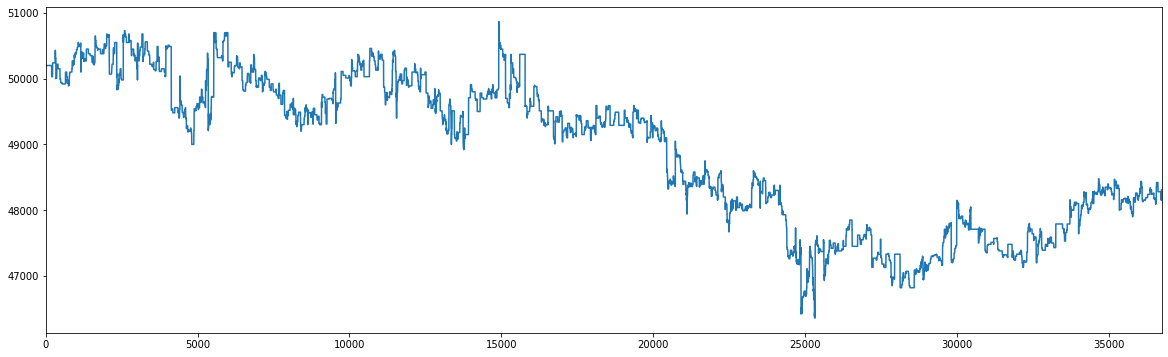

In [16]:
df_sample['close'].plot(figsize = (20,6))

## 5.3 入库

In [34]:
import pymysql
from sqlalchemy import create_engine

db_ip = '127.0.0.1'
db_user = 'root'#用户
# db_password = '1q2w3e4rasdf'#密码
db_password = None
db_name = 'market_data'#数据库
db_port = "3306"

conn = pymysql.connect(db_ip,
                       db_user,
                       db_password,
                       db_name,
                       autocommit = 1)
cursor = conn.cursor()
engine = create_engine("mysql+pymysql://root:@localhost:3306/market_data")

In [75]:
# df_sample.to_sql('futures_data',engine, index=False)

ValueError: Table 'futures_data' already exists.

In [25]:
df_sample = df_sample[['trade_time','ts_code','open','high','low','close','vol','amount','trade_date','pre_close']]

In [27]:
df_sample

,trade_time,ts_code,open,high,low,close,vol,amount,trade_date,pre_close
0,2018-10-18 09:01:00,CU1910.SHF,50220.0,50220.0,50200.0,50200.0,10.0,2510000.0,20181018,NaN
1,2018-10-18 09:02:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
2,2018-10-18 09:03:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
3,2018-10-18 09:04:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
4,2018-10-18 09:05:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
5,2018-10-18 09:06:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
6,2018-10-18 09:07:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
7,2018-10-18 09:08:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
8,2018-10-18 09:09:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0
9,2018-10-18 09:10:00,CU1910.SHF,50200.0,50200.0,50200.0,50200.0,0.0,0.0,20181018,50200.0


In [35]:
for i in range(len(df_sample)):
    val0 = df_sample.iloc[i, :10][0]
    val1 = df_sample.iloc[i, :10][1]
    val2 = int(df_sample.iloc[i, :10][2])
    val3 = int(df_sample.iloc[i, :10][3])
    val4 = int(df_sample.iloc[i, :10][4])
    val5 = int(df_sample.iloc[i, :10][5])
    val6 = int(df_sample.iloc[i, :10][6])
    val7 = int(df_sample.iloc[i, :10][7])
    val8 = df_sample.iloc[i, :10][8]
    
    try:
        cursor.execute("""INSERT INTO futures_data (trade_time,ts_code,open,high,low,close,vol,amount,trade_date) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s)""",(val0,val1,val2,val3,val4,val5,val6,val7,val8))
        print("Saved 第{}行".format(i))
    except Exception as e:
        print(e)
    
    print("===")

Saved 第0行
===
Saved 第1行
===
Saved 第2行
===
Saved 第3行
===
Saved 第4行
===
Saved 第5行
===
Saved 第6行
===
Saved 第7行
===
Saved 第8行
===
Saved 第9行
===
Saved 第10行
===
Saved 第11行
===
Saved 第12行
===
Saved 第13行
===
Saved 第14行
===
Saved 第15行
===
Saved 第16行
===
Saved 第17行
===
Saved 第18行
===
Saved 第19行
===
Saved 第20行
===
Saved 第21行
===
Saved 第22行
===
Saved 第23行
===
Saved 第24行
===
Saved 第25行
===
Saved 第26行
===
Saved 第27行
===
Saved 第28行
===
Saved 第29行
===
Saved 第30行
===
Saved 第31行
===
Saved 第32行
===
Saved 第33行
===
Saved 第34行
===
Saved 第35行
===
Saved 第36行
===
Saved 第37行
===
Saved 第38行
===
Saved 第39行
===
Saved 第40行
===
Saved 第41行
===
Saved 第42行
===
Saved 第43行
===
Saved 第44行
===
Saved 第45行
===
Saved 第46行
===
Saved 第47行
===
Saved 第48行
===
Saved 第49行
===
Saved 第50行
===
Saved 第51行
===
Saved 第52行
===
Saved 第53行
===
Saved 第54行
===
Saved 第55行
===
Saved 第56行
===
Saved 第57行
===
Saved 第58行
===
Saved 第59行
===
Saved 第60行
===
Saved 第61行
===
Saved 第62行
===
Saved 第63行
===
Saved 第64行
===
Saved 第65行
===
Saved 第66行
===
Saved

Saved 第522行
===
Saved 第523行
===
Saved 第524行
===
Saved 第525行
===
Saved 第526行
===
Saved 第527行
===
Saved 第528行
===
Saved 第529行
===
Saved 第530行
===
Saved 第531行
===
Saved 第532行
===
Saved 第533行
===
Saved 第534行
===
Saved 第535行
===
Saved 第536行
===
Saved 第537行
===
Saved 第538行
===
Saved 第539行
===
Saved 第540行
===
Saved 第541行
===
Saved 第542行
===
Saved 第543行
===
Saved 第544行
===
Saved 第545行
===
Saved 第546行
===
Saved 第547行
===
Saved 第548行
===
Saved 第549行
===
Saved 第550行
===
Saved 第551行
===
Saved 第552行
===
Saved 第553行
===
Saved 第554行
===
Saved 第555行
===
Saved 第556行
===
Saved 第557行
===
Saved 第558行
===
Saved 第559行
===
Saved 第560行
===
Saved 第561行
===
Saved 第562行
===
Saved 第563行
===
Saved 第564行
===
Saved 第565行
===
Saved 第566行
===
Saved 第567行
===
Saved 第568行
===
Saved 第569行
===
Saved 第570行
===
Saved 第571行
===
Saved 第572行
===
Saved 第573行
===
Saved 第574行
===
Saved 第575行
===
Saved 第576行
===
Saved 第577行
===
Saved 第578行
===
Saved 第579行
===
Saved 第580行
===
Saved 第581行
===
Saved 第582行
===
Saved 第583行
===
Saved 第5

Saved 第1036行
===
Saved 第1037行
===
Saved 第1038行
===
Saved 第1039行
===
Saved 第1040行
===
Saved 第1041行
===
Saved 第1042行
===
Saved 第1043行
===
Saved 第1044行
===
Saved 第1045行
===
Saved 第1046行
===
Saved 第1047行
===
Saved 第1048行
===
Saved 第1049行
===
Saved 第1050行
===
Saved 第1051行
===
Saved 第1052行
===
Saved 第1053行
===
Saved 第1054行
===
Saved 第1055行
===
Saved 第1056行
===
Saved 第1057行
===
Saved 第1058行
===
Saved 第1059行
===
Saved 第1060行
===
Saved 第1061行
===
Saved 第1062行
===
Saved 第1063行
===
Saved 第1064行
===
Saved 第1065行
===
Saved 第1066行
===
Saved 第1067行
===
Saved 第1068行
===
Saved 第1069行
===
Saved 第1070行
===
Saved 第1071行
===
Saved 第1072行
===
Saved 第1073行
===
Saved 第1074行
===
Saved 第1075行
===
Saved 第1076行
===
Saved 第1077行
===
Saved 第1078行
===
Saved 第1079行
===
Saved 第1080行
===
Saved 第1081行
===
Saved 第1082行
===
Saved 第1083行
===
Saved 第1084行
===
Saved 第1085行
===
Saved 第1086行
===
Saved 第1087行
===
Saved 第1088行
===
Saved 第1089行
===
Saved 第1090行
===
Saved 第1091行
===
Saved 第1092行
===
Saved 第1093行
===
Saved 第1094行
=

Saved 第1531行
===
Saved 第1532行
===
Saved 第1533行
===
Saved 第1534行
===
Saved 第1535行
===
Saved 第1536行
===
Saved 第1537行
===
Saved 第1538行
===
Saved 第1539行
===
Saved 第1540行
===
Saved 第1541行
===
Saved 第1542行
===
Saved 第1543行
===
Saved 第1544行
===
Saved 第1545行
===
Saved 第1546行
===
Saved 第1547行
===
Saved 第1548行
===
Saved 第1549行
===
Saved 第1550行
===
Saved 第1551行
===
Saved 第1552行
===
Saved 第1553行
===
Saved 第1554行
===
Saved 第1555行
===
Saved 第1556行
===
Saved 第1557行
===
Saved 第1558行
===
Saved 第1559行
===
Saved 第1560行
===
Saved 第1561行
===
Saved 第1562行
===
Saved 第1563行
===
Saved 第1564行
===
Saved 第1565行
===
Saved 第1566行
===
Saved 第1567行
===
Saved 第1568行
===
Saved 第1569行
===
Saved 第1570行
===
Saved 第1571行
===
Saved 第1572行
===
Saved 第1573行
===
Saved 第1574行
===
Saved 第1575行
===
Saved 第1576行
===
Saved 第1577行
===
Saved 第1578行
===
Saved 第1579行
===
Saved 第1580行
===
Saved 第1581行
===
Saved 第1582行
===
Saved 第1583行
===
Saved 第1584行
===
Saved 第1585行
===
Saved 第1586行
===
Saved 第1587行
===
Saved 第1588行
===
Saved 第1589行
=

Saved 第2030行
===
Saved 第2031行
===
Saved 第2032行
===
Saved 第2033行
===
Saved 第2034行
===
Saved 第2035行
===
Saved 第2036行
===
Saved 第2037行
===
Saved 第2038行
===
Saved 第2039行
===
Saved 第2040行
===
Saved 第2041行
===
Saved 第2042行
===
Saved 第2043行
===
Saved 第2044行
===
Saved 第2045行
===
Saved 第2046行
===
Saved 第2047行
===
Saved 第2048行
===
Saved 第2049行
===
Saved 第2050行
===
Saved 第2051行
===
Saved 第2052行
===
Saved 第2053行
===
Saved 第2054行
===
Saved 第2055行
===
Saved 第2056行
===
Saved 第2057行
===
Saved 第2058行
===
Saved 第2059行
===
Saved 第2060行
===
Saved 第2061行
===
Saved 第2062行
===
Saved 第2063行
===
Saved 第2064行
===
Saved 第2065行
===
Saved 第2066行
===
Saved 第2067行
===
Saved 第2068行
===
Saved 第2069行
===
Saved 第2070行
===
Saved 第2071行
===
Saved 第2072行
===
Saved 第2073行
===
Saved 第2074行
===
Saved 第2075行
===
Saved 第2076行
===
Saved 第2077行
===
Saved 第2078行
===
Saved 第2079行
===
Saved 第2080行
===
Saved 第2081行
===
Saved 第2082行
===
Saved 第2083行
===
Saved 第2084行
===
Saved 第2085行
===
Saved 第2086行
===
Saved 第2087行
===
Saved 第2088行
=

Saved 第2519行
===
Saved 第2520行
===
Saved 第2521行
===
Saved 第2522行
===
Saved 第2523行
===
Saved 第2524行
===
Saved 第2525行
===
Saved 第2526行
===
Saved 第2527行
===
Saved 第2528行
===
Saved 第2529行
===
Saved 第2530行
===
Saved 第2531行
===
Saved 第2532行
===
Saved 第2533行
===
Saved 第2534行
===
Saved 第2535行
===
Saved 第2536行
===
Saved 第2537行
===
Saved 第2538行
===
Saved 第2539行
===
Saved 第2540行
===
Saved 第2541行
===
Saved 第2542行
===
Saved 第2543行
===
Saved 第2544行
===
Saved 第2545行
===
Saved 第2546行
===
Saved 第2547行
===
Saved 第2548行
===
Saved 第2549行
===
Saved 第2550行
===
Saved 第2551行
===
Saved 第2552行
===
Saved 第2553行
===
Saved 第2554行
===
Saved 第2555行
===
Saved 第2556行
===
Saved 第2557行
===
Saved 第2558行
===
Saved 第2559行
===
Saved 第2560行
===
Saved 第2561行
===
Saved 第2562行
===
Saved 第2563行
===
Saved 第2564行
===
Saved 第2565行
===
Saved 第2566行
===
Saved 第2567行
===
Saved 第2568行
===
Saved 第2569行
===
Saved 第2570行
===
Saved 第2571行
===
Saved 第2572行
===
Saved 第2573行
===
Saved 第2574行
===
Saved 第2575行
===
Saved 第2576行
===
Saved 第2577行
=

Saved 第3014行
===
Saved 第3015行
===
Saved 第3016行
===
Saved 第3017行
===
Saved 第3018行
===
Saved 第3019行
===
Saved 第3020行
===
Saved 第3021行
===
Saved 第3022行
===
Saved 第3023行
===
Saved 第3024行
===
Saved 第3025行
===
Saved 第3026行
===
Saved 第3027行
===
Saved 第3028行
===
Saved 第3029行
===
Saved 第3030行
===
Saved 第3031行
===
Saved 第3032行
===
Saved 第3033行
===
Saved 第3034行
===
Saved 第3035行
===
Saved 第3036行
===
Saved 第3037行
===
Saved 第3038行
===
Saved 第3039行
===
Saved 第3040行
===
Saved 第3041行
===
Saved 第3042行
===
Saved 第3043行
===
Saved 第3044行
===
Saved 第3045行
===
Saved 第3046行
===
Saved 第3047行
===
Saved 第3048行
===
Saved 第3049行
===
Saved 第3050行
===
Saved 第3051行
===
Saved 第3052行
===
Saved 第3053行
===
Saved 第3054行
===
Saved 第3055行
===
Saved 第3056行
===
Saved 第3057行
===
Saved 第3058行
===
Saved 第3059行
===
Saved 第3060行
===
Saved 第3061行
===
Saved 第3062行
===
Saved 第3063行
===
Saved 第3064行
===
Saved 第3065行
===
Saved 第3066行
===
Saved 第3067行
===
Saved 第3068行
===
Saved 第3069行
===
Saved 第3070行
===
Saved 第3071行
===
Saved 第3072行
=

Saved 第3513行
===
Saved 第3514行
===
Saved 第3515行
===
Saved 第3516行
===
Saved 第3517行
===
Saved 第3518行
===
Saved 第3519行
===
Saved 第3520行
===
Saved 第3521行
===
Saved 第3522行
===
Saved 第3523行
===
Saved 第3524行
===
Saved 第3525行
===
Saved 第3526行
===
Saved 第3527行
===
Saved 第3528行
===
Saved 第3529行
===
Saved 第3530行
===
Saved 第3531行
===
Saved 第3532行
===
Saved 第3533行
===
Saved 第3534行
===
Saved 第3535行
===
Saved 第3536行
===
Saved 第3537行
===
Saved 第3538行
===
Saved 第3539行
===
Saved 第3540行
===
Saved 第3541行
===
Saved 第3542行
===
Saved 第3543行
===
Saved 第3544行
===
Saved 第3545行
===
Saved 第3546行
===
Saved 第3547行
===
Saved 第3548行
===
Saved 第3549行
===
Saved 第3550行
===
Saved 第3551行
===
Saved 第3552行
===
Saved 第3553行
===
Saved 第3554行
===
Saved 第3555行
===
Saved 第3556行
===
Saved 第3557行
===
Saved 第3558行
===
Saved 第3559行
===
Saved 第3560行
===
Saved 第3561行
===
Saved 第3562行
===
Saved 第3563行
===
Saved 第3564行
===
Saved 第3565行
===
Saved 第3566行
===
Saved 第3567行
===
Saved 第3568行
===
Saved 第3569行
===
Saved 第3570行
===
Saved 第3571行
=

Saved 第4013行
===
Saved 第4014行
===
Saved 第4015行
===
Saved 第4016行
===
Saved 第4017行
===
Saved 第4018行
===
Saved 第4019行
===
Saved 第4020行
===
Saved 第4021行
===
Saved 第4022行
===
Saved 第4023行
===
Saved 第4024行
===
Saved 第4025行
===
Saved 第4026行
===
Saved 第4027行
===
Saved 第4028行
===
Saved 第4029行
===
Saved 第4030行
===
Saved 第4031行
===
Saved 第4032行
===
Saved 第4033行
===
Saved 第4034行
===
Saved 第4035行
===
Saved 第4036行
===
Saved 第4037行
===
Saved 第4038行
===
Saved 第4039行
===
Saved 第4040行
===
Saved 第4041行
===
Saved 第4042行
===
Saved 第4043行
===
Saved 第4044行
===
Saved 第4045行
===
Saved 第4046行
===
Saved 第4047行
===
Saved 第4048行
===
Saved 第4049行
===
Saved 第4050行
===
Saved 第4051行
===
Saved 第4052行
===
Saved 第4053行
===
Saved 第4054行
===
Saved 第4055行
===
Saved 第4056行
===
Saved 第4057行
===
Saved 第4058行
===
Saved 第4059行
===
Saved 第4060行
===
Saved 第4061行
===
Saved 第4062行
===
Saved 第4063行
===
Saved 第4064行
===
Saved 第4065行
===
Saved 第4066行
===
Saved 第4067行
===
Saved 第4068行
===
Saved 第4069行
===
Saved 第4070行
===
Saved 第4071行
=

Saved 第4498行
===
Saved 第4499行
===
Saved 第4500行
===
Saved 第4501行
===
Saved 第4502行
===
Saved 第4503行
===
Saved 第4504行
===
Saved 第4505行
===
Saved 第4506行
===
Saved 第4507行
===
Saved 第4508行
===
Saved 第4509行
===
Saved 第4510行
===
Saved 第4511行
===
Saved 第4512行
===
Saved 第4513行
===
Saved 第4514行
===
Saved 第4515行
===
Saved 第4516行
===
Saved 第4517行
===
Saved 第4518行
===
Saved 第4519行
===
Saved 第4520行
===
Saved 第4521行
===
Saved 第4522行
===
Saved 第4523行
===
Saved 第4524行
===
Saved 第4525行
===
Saved 第4526行
===
Saved 第4527行
===
Saved 第4528行
===
Saved 第4529行
===
Saved 第4530行
===
Saved 第4531行
===
Saved 第4532行
===
Saved 第4533行
===
Saved 第4534行
===
Saved 第4535行
===
Saved 第4536行
===
Saved 第4537行
===
Saved 第4538行
===
Saved 第4539行
===
Saved 第4540行
===
Saved 第4541行
===
Saved 第4542行
===
Saved 第4543行
===
Saved 第4544行
===
Saved 第4545行
===
Saved 第4546行
===
Saved 第4547行
===
Saved 第4548行
===
Saved 第4549行
===
Saved 第4550行
===
Saved 第4551行
===
Saved 第4552行
===
Saved 第4553行
===
Saved 第4554行
===
Saved 第4555行
===
Saved 第4556行
=

Saved 第4996行
===
Saved 第4997行
===
Saved 第4998行
===
Saved 第4999行
===
Saved 第5000行
===
Saved 第5001行
===
Saved 第5002行
===
Saved 第5003行
===
Saved 第5004行
===
Saved 第5005行
===
Saved 第5006行
===
Saved 第5007行
===
Saved 第5008行
===
Saved 第5009行
===
Saved 第5010行
===
Saved 第5011行
===
Saved 第5012行
===
Saved 第5013行
===
Saved 第5014行
===
Saved 第5015行
===
Saved 第5016行
===
Saved 第5017行
===
Saved 第5018行
===
Saved 第5019行
===
Saved 第5020行
===
Saved 第5021行
===
Saved 第5022行
===
Saved 第5023行
===
Saved 第5024行
===
Saved 第5025行
===
Saved 第5026行
===
Saved 第5027行
===
Saved 第5028行
===
Saved 第5029行
===
Saved 第5030行
===
Saved 第5031行
===
Saved 第5032行
===
Saved 第5033行
===
Saved 第5034行
===
Saved 第5035行
===
Saved 第5036行
===
Saved 第5037行
===
Saved 第5038行
===
Saved 第5039行
===
Saved 第5040行
===
Saved 第5041行
===
Saved 第5042行
===
Saved 第5043行
===
Saved 第5044行
===
Saved 第5045行
===
Saved 第5046行
===
Saved 第5047行
===
Saved 第5048行
===
Saved 第5049行
===
Saved 第5050行
===
Saved 第5051行
===
Saved 第5052行
===
Saved 第5053行
===
Saved 第5054行
=

Saved 第5488行
===
Saved 第5489行
===
Saved 第5490行
===
Saved 第5491行
===
Saved 第5492行
===
Saved 第5493行
===
Saved 第5494行
===
Saved 第5495行
===
Saved 第5496行
===
Saved 第5497行
===
Saved 第5498行
===
Saved 第5499行
===
Saved 第5500行
===
Saved 第5501行
===
Saved 第5502行
===
Saved 第5503行
===
Saved 第5504行
===
Saved 第5505行
===
Saved 第5506行
===
Saved 第5507行
===
Saved 第5508行
===
Saved 第5509行
===
Saved 第5510行
===
Saved 第5511行
===
Saved 第5512行
===
Saved 第5513行
===
Saved 第5514行
===
Saved 第5515行
===
Saved 第5516行
===
Saved 第5517行
===
Saved 第5518行
===
Saved 第5519行
===
Saved 第5520行
===
Saved 第5521行
===
Saved 第5522行
===
Saved 第5523行
===
Saved 第5524行
===
Saved 第5525行
===
Saved 第5526行
===
Saved 第5527行
===
Saved 第5528行
===
Saved 第5529行
===
Saved 第5530行
===
Saved 第5531行
===
Saved 第5532行
===
Saved 第5533行
===
Saved 第5534行
===
Saved 第5535行
===
Saved 第5536行
===
Saved 第5537行
===
Saved 第5538行
===
Saved 第5539行
===
Saved 第5540行
===
Saved 第5541行
===
Saved 第5542行
===
Saved 第5543行
===
Saved 第5544行
===
Saved 第5545行
===
Saved 第5546行
=

Saved 第5989行
===
Saved 第5990行
===
Saved 第5991行
===
Saved 第5992行
===
Saved 第5993行
===
Saved 第5994行
===
Saved 第5995行
===
Saved 第5996行
===
Saved 第5997行
===
Saved 第5998行
===
Saved 第5999行
===
Saved 第6000行
===
Saved 第6001行
===
Saved 第6002行
===
Saved 第6003行
===
Saved 第6004行
===
Saved 第6005行
===
Saved 第6006行
===
Saved 第6007行
===
Saved 第6008行
===
Saved 第6009行
===
Saved 第6010行
===
Saved 第6011行
===
Saved 第6012行
===
Saved 第6013行
===
Saved 第6014行
===
Saved 第6015行
===
Saved 第6016行
===
Saved 第6017行
===
Saved 第6018行
===
Saved 第6019行
===
Saved 第6020行
===
Saved 第6021行
===
Saved 第6022行
===
Saved 第6023行
===
Saved 第6024行
===
Saved 第6025行
===
Saved 第6026行
===
Saved 第6027行
===
Saved 第6028行
===
Saved 第6029行
===
Saved 第6030行
===
Saved 第6031行
===
Saved 第6032行
===
Saved 第6033行
===
Saved 第6034行
===
Saved 第6035行
===
Saved 第6036行
===
Saved 第6037行
===
Saved 第6038行
===
Saved 第6039行
===
Saved 第6040行
===
Saved 第6041行
===
Saved 第6042行
===
Saved 第6043行
===
Saved 第6044行
===
Saved 第6045行
===
Saved 第6046行
===
Saved 第6047行
=

Saved 第6480行
===
Saved 第6481行
===
Saved 第6482行
===
Saved 第6483行
===
Saved 第6484行
===
Saved 第6485行
===
Saved 第6486行
===
Saved 第6487行
===
Saved 第6488行
===
Saved 第6489行
===
Saved 第6490行
===
Saved 第6491行
===
Saved 第6492行
===
Saved 第6493行
===
Saved 第6494行
===
Saved 第6495行
===
Saved 第6496行
===
Saved 第6497行
===
Saved 第6498行
===
Saved 第6499行
===
Saved 第6500行
===
Saved 第6501行
===
Saved 第6502行
===
Saved 第6503行
===
Saved 第6504行
===
Saved 第6505行
===
Saved 第6506行
===
Saved 第6507行
===
Saved 第6508行
===
Saved 第6509行
===
Saved 第6510行
===
Saved 第6511行
===
Saved 第6512行
===
Saved 第6513行
===
Saved 第6514行
===
Saved 第6515行
===
Saved 第6516行
===
Saved 第6517行
===
Saved 第6518行
===
Saved 第6519行
===
Saved 第6520行
===
Saved 第6521行
===
Saved 第6522行
===
Saved 第6523行
===
Saved 第6524行
===
Saved 第6525行
===
Saved 第6526行
===
Saved 第6527行
===
Saved 第6528行
===
Saved 第6529行
===
Saved 第6530行
===
Saved 第6531行
===
Saved 第6532行
===
Saved 第6533行
===
Saved 第6534行
===
Saved 第6535行
===
Saved 第6536行
===
Saved 第6537行
===
Saved 第6538行
=

Saved 第6970行
===
Saved 第6971行
===
Saved 第6972行
===
Saved 第6973行
===
Saved 第6974行
===
Saved 第6975行
===
Saved 第6976行
===
Saved 第6977行
===
Saved 第6978行
===
Saved 第6979行
===
Saved 第6980行
===
Saved 第6981行
===
Saved 第6982行
===
Saved 第6983行
===
Saved 第6984行
===
Saved 第6985行
===
Saved 第6986行
===
Saved 第6987行
===
Saved 第6988行
===
Saved 第6989行
===
Saved 第6990行
===
Saved 第6991行
===
Saved 第6992行
===
Saved 第6993行
===
Saved 第6994行
===
Saved 第6995行
===
Saved 第6996行
===
Saved 第6997行
===
Saved 第6998行
===
Saved 第6999行
===
Saved 第7000行
===
Saved 第7001行
===
Saved 第7002行
===
Saved 第7003行
===
Saved 第7004行
===
Saved 第7005行
===
Saved 第7006行
===
Saved 第7007行
===
Saved 第7008行
===
Saved 第7009行
===
Saved 第7010行
===
Saved 第7011行
===
Saved 第7012行
===
Saved 第7013行
===
Saved 第7014行
===
Saved 第7015行
===
Saved 第7016行
===
Saved 第7017行
===
Saved 第7018行
===
Saved 第7019行
===
Saved 第7020行
===
Saved 第7021行
===
Saved 第7022行
===
Saved 第7023行
===
Saved 第7024行
===
Saved 第7025行
===
Saved 第7026行
===
Saved 第7027行
===
Saved 第7028行
=

Saved 第7468行
===
Saved 第7469行
===
Saved 第7470行
===
Saved 第7471行
===
Saved 第7472行
===
Saved 第7473行
===
Saved 第7474行
===
Saved 第7475行
===
Saved 第7476行
===
Saved 第7477行
===
Saved 第7478行
===
Saved 第7479行
===
Saved 第7480行
===
Saved 第7481行
===
Saved 第7482行
===
Saved 第7483行
===
Saved 第7484行
===
Saved 第7485行
===
Saved 第7486行
===
Saved 第7487行
===
Saved 第7488行
===
Saved 第7489行
===
Saved 第7490行
===
Saved 第7491行
===
Saved 第7492行
===
Saved 第7493行
===
Saved 第7494行
===
Saved 第7495行
===
Saved 第7496行
===
Saved 第7497行
===
Saved 第7498行
===
Saved 第7499行
===
Saved 第7500行
===
Saved 第7501行
===
Saved 第7502行
===
Saved 第7503行
===
Saved 第7504行
===
Saved 第7505行
===
Saved 第7506行
===
Saved 第7507行
===
Saved 第7508行
===
Saved 第7509行
===
Saved 第7510行
===
Saved 第7511行
===
Saved 第7512行
===
Saved 第7513行
===
Saved 第7514行
===
Saved 第7515行
===
Saved 第7516行
===
Saved 第7517行
===
Saved 第7518行
===
Saved 第7519行
===
Saved 第7520行
===
Saved 第7521行
===
Saved 第7522行
===
Saved 第7523行
===
Saved 第7524行
===
Saved 第7525行
===
Saved 第7526行
=

Saved 第7967行
===
Saved 第7968行
===
Saved 第7969行
===
Saved 第7970行
===
Saved 第7971行
===
Saved 第7972行
===
Saved 第7973行
===
Saved 第7974行
===
Saved 第7975行
===
Saved 第7976行
===
Saved 第7977行
===
Saved 第7978行
===
Saved 第7979行
===
Saved 第7980行
===
Saved 第7981行
===
Saved 第7982行
===
Saved 第7983行
===
Saved 第7984行
===
Saved 第7985行
===
Saved 第7986行
===
Saved 第7987行
===
Saved 第7988行
===
Saved 第7989行
===
Saved 第7990行
===
Saved 第7991行
===
Saved 第7992行
===
Saved 第7993行
===
Saved 第7994行
===
Saved 第7995行
===
Saved 第7996行
===
Saved 第7997行
===
Saved 第7998行
===
Saved 第7999行
===
Saved 第8000行
===
Saved 第8001行
===
Saved 第8002行
===
Saved 第8003行
===
Saved 第8004行
===
Saved 第8005行
===
Saved 第8006行
===
Saved 第8007行
===
Saved 第8008行
===
Saved 第8009行
===
Saved 第8010行
===
Saved 第8011行
===
Saved 第8012行
===
Saved 第8013行
===
Saved 第8014行
===
Saved 第8015行
===
Saved 第8016行
===
Saved 第8017行
===
Saved 第8018行
===
Saved 第8019行
===
Saved 第8020行
===
Saved 第8021行
===
Saved 第8022行
===
Saved 第8023行
===
Saved 第8024行
===
Saved 第8025行
=

Saved 第8452行
===
Saved 第8453行
===
Saved 第8454行
===
Saved 第8455行
===
Saved 第8456行
===
Saved 第8457行
===
Saved 第8458行
===
Saved 第8459行
===
Saved 第8460行
===
Saved 第8461行
===
Saved 第8462行
===
Saved 第8463行
===
Saved 第8464行
===
Saved 第8465行
===
Saved 第8466行
===
Saved 第8467行
===
Saved 第8468行
===
Saved 第8469行
===
Saved 第8470行
===
Saved 第8471行
===
Saved 第8472行
===
Saved 第8473行
===
Saved 第8474行
===
Saved 第8475行
===
Saved 第8476行
===
Saved 第8477行
===
Saved 第8478行
===
Saved 第8479行
===
Saved 第8480行
===
Saved 第8481行
===
Saved 第8482行
===
Saved 第8483行
===
Saved 第8484行
===
Saved 第8485行
===
Saved 第8486行
===
Saved 第8487行
===
Saved 第8488行
===
Saved 第8489行
===
Saved 第8490行
===
Saved 第8491行
===
Saved 第8492行
===
Saved 第8493行
===
Saved 第8494行
===
Saved 第8495行
===
Saved 第8496行
===
Saved 第8497行
===
Saved 第8498行
===
Saved 第8499行
===
Saved 第8500行
===
Saved 第8501行
===
Saved 第8502行
===
Saved 第8503行
===
Saved 第8504行
===
Saved 第8505行
===
Saved 第8506行
===
Saved 第8507行
===
Saved 第8508行
===
Saved 第8509行
===
Saved 第8510行
=

Saved 第8942行
===
Saved 第8943行
===
Saved 第8944行
===
Saved 第8945行
===
Saved 第8946行
===
Saved 第8947行
===
Saved 第8948行
===
Saved 第8949行
===
Saved 第8950行
===
Saved 第8951行
===
Saved 第8952行
===
Saved 第8953行
===
Saved 第8954行
===
Saved 第8955行
===
Saved 第8956行
===
Saved 第8957行
===
Saved 第8958行
===
Saved 第8959行
===
Saved 第8960行
===
Saved 第8961行
===
Saved 第8962行
===
Saved 第8963行
===
Saved 第8964行
===
Saved 第8965行
===
Saved 第8966行
===
Saved 第8967行
===
Saved 第8968行
===
Saved 第8969行
===
Saved 第8970行
===
Saved 第8971行
===
Saved 第8972行
===
Saved 第8973行
===
Saved 第8974行
===
Saved 第8975行
===
Saved 第8976行
===
Saved 第8977行
===
Saved 第8978行
===
Saved 第8979行
===
Saved 第8980行
===
Saved 第8981行
===
Saved 第8982行
===
Saved 第8983行
===
Saved 第8984行
===
Saved 第8985行
===
Saved 第8986行
===
Saved 第8987行
===
Saved 第8988行
===
Saved 第8989行
===
Saved 第8990行
===
Saved 第8991行
===
Saved 第8992行
===
Saved 第8993行
===
Saved 第8994行
===
Saved 第8995行
===
Saved 第8996行
===
Saved 第8997行
===
Saved 第8998行
===
Saved 第8999行
===
Saved 第9000行
=

Saved 第9437行
===
Saved 第9438行
===
Saved 第9439行
===
Saved 第9440行
===
Saved 第9441行
===
Saved 第9442行
===
Saved 第9443行
===
Saved 第9444行
===
Saved 第9445行
===
Saved 第9446行
===
Saved 第9447行
===
Saved 第9448行
===
Saved 第9449行
===
Saved 第9450行
===
Saved 第9451行
===
Saved 第9452行
===
Saved 第9453行
===
Saved 第9454行
===
Saved 第9455行
===
Saved 第9456行
===
Saved 第9457行
===
Saved 第9458行
===
Saved 第9459行
===
Saved 第9460行
===
Saved 第9461行
===
Saved 第9462行
===
Saved 第9463行
===
Saved 第9464行
===
Saved 第9465行
===
Saved 第9466行
===
Saved 第9467行
===
Saved 第9468行
===
Saved 第9469行
===
Saved 第9470行
===
Saved 第9471行
===
Saved 第9472行
===
Saved 第9473行
===
Saved 第9474行
===
Saved 第9475行
===
Saved 第9476行
===
Saved 第9477行
===
Saved 第9478行
===
Saved 第9479行
===
Saved 第9480行
===
Saved 第9481行
===
Saved 第9482行
===
Saved 第9483行
===
Saved 第9484行
===
Saved 第9485行
===
Saved 第9486行
===
Saved 第9487行
===
Saved 第9488行
===
Saved 第9489行
===
Saved 第9490行
===
Saved 第9491行
===
Saved 第9492行
===
Saved 第9493行
===
Saved 第9494行
===
Saved 第9495行
=

Saved 第9925行
===
Saved 第9926行
===
Saved 第9927行
===
Saved 第9928行
===
Saved 第9929行
===
Saved 第9930行
===
Saved 第9931行
===
Saved 第9932行
===
Saved 第9933行
===
Saved 第9934行
===
Saved 第9935行
===
Saved 第9936行
===
Saved 第9937行
===
Saved 第9938行
===
Saved 第9939行
===
Saved 第9940行
===
Saved 第9941行
===
Saved 第9942行
===
Saved 第9943行
===
Saved 第9944行
===
Saved 第9945行
===
Saved 第9946行
===
Saved 第9947行
===
Saved 第9948行
===
Saved 第9949行
===
Saved 第9950行
===
Saved 第9951行
===
Saved 第9952行
===
Saved 第9953行
===
Saved 第9954行
===
Saved 第9955行
===
Saved 第9956行
===
Saved 第9957行
===
Saved 第9958行
===
Saved 第9959行
===
Saved 第9960行
===
Saved 第9961行
===
Saved 第9962行
===
Saved 第9963行
===
Saved 第9964行
===
Saved 第9965行
===
Saved 第9966行
===
Saved 第9967行
===
Saved 第9968行
===
Saved 第9969行
===
Saved 第9970行
===
Saved 第9971行
===
Saved 第9972行
===
Saved 第9973行
===
Saved 第9974行
===
Saved 第9975行
===
Saved 第9976行
===
Saved 第9977行
===
Saved 第9978行
===
Saved 第9979行
===
Saved 第9980行
===
Saved 第9981行
===
Saved 第9982行
===
Saved 第9983行
=

Saved 第10396行
===
Saved 第10397行
===
Saved 第10398行
===
Saved 第10399行
===
Saved 第10400行
===
Saved 第10401行
===
Saved 第10402行
===
Saved 第10403行
===
Saved 第10404行
===
Saved 第10405行
===
Saved 第10406行
===
Saved 第10407行
===
Saved 第10408行
===
Saved 第10409行
===
Saved 第10410行
===
Saved 第10411行
===
Saved 第10412行
===
Saved 第10413行
===
Saved 第10414行
===
Saved 第10415行
===
Saved 第10416行
===
Saved 第10417行
===
Saved 第10418行
===
Saved 第10419行
===
Saved 第10420行
===
Saved 第10421行
===
Saved 第10422行
===
Saved 第10423行
===
Saved 第10424行
===
Saved 第10425行
===
Saved 第10426行
===
Saved 第10427行
===
Saved 第10428行
===
Saved 第10429行
===
Saved 第10430行
===
Saved 第10431行
===
Saved 第10432行
===
Saved 第10433行
===
Saved 第10434行
===
Saved 第10435行
===
Saved 第10436行
===
Saved 第10437行
===
Saved 第10438行
===
Saved 第10439行
===
Saved 第10440行
===
Saved 第10441行
===
Saved 第10442行
===
Saved 第10443行
===
Saved 第10444行
===
Saved 第10445行
===
Saved 第10446行
===
Saved 第10447行
===
Saved 第10448行
===
Saved 第10449行
===
Saved 第10450行
===
Saved 第104

Saved 第10853行
===
Saved 第10854行
===
Saved 第10855行
===
Saved 第10856行
===
Saved 第10857行
===
Saved 第10858行
===
Saved 第10859行
===
Saved 第10860行
===
Saved 第10861行
===
Saved 第10862行
===
Saved 第10863行
===
Saved 第10864行
===
Saved 第10865行
===
Saved 第10866行
===
Saved 第10867行
===
Saved 第10868行
===
Saved 第10869行
===
Saved 第10870行
===
Saved 第10871行
===
Saved 第10872行
===
Saved 第10873行
===
Saved 第10874行
===
Saved 第10875行
===
Saved 第10876行
===
Saved 第10877行
===
Saved 第10878行
===
Saved 第10879行
===
Saved 第10880行
===
Saved 第10881行
===
Saved 第10882行
===
Saved 第10883行
===
Saved 第10884行
===
Saved 第10885行
===
Saved 第10886行
===
Saved 第10887行
===
Saved 第10888行
===
Saved 第10889行
===
Saved 第10890行
===
Saved 第10891行
===
Saved 第10892行
===
Saved 第10893行
===
Saved 第10894行
===
Saved 第10895行
===
Saved 第10896行
===
Saved 第10897行
===
Saved 第10898行
===
Saved 第10899行
===
Saved 第10900行
===
Saved 第10901行
===
Saved 第10902行
===
Saved 第10903行
===
Saved 第10904行
===
Saved 第10905行
===
Saved 第10906行
===
Saved 第10907行
===
Saved 第109

Saved 第11321行
===
Saved 第11322行
===
Saved 第11323行
===
Saved 第11324行
===
Saved 第11325行
===
Saved 第11326行
===
Saved 第11327行
===
Saved 第11328行
===
Saved 第11329行
===
Saved 第11330行
===
Saved 第11331行
===
Saved 第11332行
===
Saved 第11333行
===
Saved 第11334行
===
Saved 第11335行
===
Saved 第11336行
===
Saved 第11337行
===
Saved 第11338行
===
Saved 第11339行
===
Saved 第11340行
===
Saved 第11341行
===
Saved 第11342行
===
Saved 第11343行
===
Saved 第11344行
===
Saved 第11345行
===
Saved 第11346行
===
Saved 第11347行
===
Saved 第11348行
===
Saved 第11349行
===
Saved 第11350行
===
Saved 第11351行
===
Saved 第11352行
===
Saved 第11353行
===
Saved 第11354行
===
Saved 第11355行
===
Saved 第11356行
===
Saved 第11357行
===
Saved 第11358行
===
Saved 第11359行
===
Saved 第11360行
===
Saved 第11361行
===
Saved 第11362行
===
Saved 第11363行
===
Saved 第11364行
===
Saved 第11365行
===
Saved 第11366行
===
Saved 第11367行
===
Saved 第11368行
===
Saved 第11369行
===
Saved 第11370行
===
Saved 第11371行
===
Saved 第11372行
===
Saved 第11373行
===
Saved 第11374行
===
Saved 第11375行
===
Saved 第113

Saved 第11779行
===
Saved 第11780行
===
Saved 第11781行
===
Saved 第11782行
===
Saved 第11783行
===
Saved 第11784行
===
Saved 第11785行
===
Saved 第11786行
===
Saved 第11787行
===
Saved 第11788行
===
Saved 第11789行
===
Saved 第11790行
===
Saved 第11791行
===
Saved 第11792行
===
Saved 第11793行
===
Saved 第11794行
===
Saved 第11795行
===
Saved 第11796行
===
Saved 第11797行
===
Saved 第11798行
===
Saved 第11799行
===
Saved 第11800行
===
Saved 第11801行
===
Saved 第11802行
===
Saved 第11803行
===
Saved 第11804行
===
Saved 第11805行
===
Saved 第11806行
===
Saved 第11807行
===
Saved 第11808行
===
Saved 第11809行
===
Saved 第11810行
===
Saved 第11811行
===
Saved 第11812行
===
Saved 第11813行
===
Saved 第11814行
===
Saved 第11815行
===
Saved 第11816行
===
Saved 第11817行
===
Saved 第11818行
===
Saved 第11819行
===
Saved 第11820行
===
Saved 第11821行
===
Saved 第11822行
===
Saved 第11823行
===
Saved 第11824行
===
Saved 第11825行
===
Saved 第11826行
===
Saved 第11827行
===
Saved 第11828行
===
Saved 第11829行
===
Saved 第11830行
===
Saved 第11831行
===
Saved 第11832行
===
Saved 第11833行
===
Saved 第118

Saved 第12242行
===
Saved 第12243行
===
Saved 第12244行
===
Saved 第12245行
===
Saved 第12246行
===
Saved 第12247行
===
Saved 第12248行
===
Saved 第12249行
===
Saved 第12250行
===
Saved 第12251行
===
Saved 第12252行
===
Saved 第12253行
===
Saved 第12254行
===
Saved 第12255行
===
Saved 第12256行
===
Saved 第12257行
===
Saved 第12258行
===
Saved 第12259行
===
Saved 第12260行
===
Saved 第12261行
===
Saved 第12262行
===
Saved 第12263行
===
Saved 第12264行
===
Saved 第12265行
===
Saved 第12266行
===
Saved 第12267行
===
Saved 第12268行
===
Saved 第12269行
===
Saved 第12270行
===
Saved 第12271行
===
Saved 第12272行
===
Saved 第12273行
===
Saved 第12274行
===
Saved 第12275行
===
Saved 第12276行
===
Saved 第12277行
===
Saved 第12278行
===
Saved 第12279行
===
Saved 第12280行
===
Saved 第12281行
===
Saved 第12282行
===
Saved 第12283行
===
Saved 第12284行
===
Saved 第12285行
===
Saved 第12286行
===
Saved 第12287行
===
Saved 第12288行
===
Saved 第12289行
===
Saved 第12290行
===
Saved 第12291行
===
Saved 第12292行
===
Saved 第12293行
===
Saved 第12294行
===
Saved 第12295行
===
Saved 第12296行
===
Saved 第122

Saved 第12706行
===
Saved 第12707行
===
Saved 第12708行
===
Saved 第12709行
===
Saved 第12710行
===
Saved 第12711行
===
Saved 第12712行
===
Saved 第12713行
===
Saved 第12714行
===
Saved 第12715行
===
Saved 第12716行
===
Saved 第12717行
===
Saved 第12718行
===
Saved 第12719行
===
Saved 第12720行
===
Saved 第12721行
===
Saved 第12722行
===
Saved 第12723行
===
Saved 第12724行
===
Saved 第12725行
===
Saved 第12726行
===
Saved 第12727行
===
Saved 第12728行
===
Saved 第12729行
===
Saved 第12730行
===
Saved 第12731行
===
Saved 第12732行
===
Saved 第12733行
===
Saved 第12734行
===
Saved 第12735行
===
Saved 第12736行
===
Saved 第12737行
===
Saved 第12738行
===
Saved 第12739行
===
Saved 第12740行
===
Saved 第12741行
===
Saved 第12742行
===
Saved 第12743行
===
Saved 第12744行
===
Saved 第12745行
===
Saved 第12746行
===
Saved 第12747行
===
Saved 第12748行
===
Saved 第12749行
===
Saved 第12750行
===
Saved 第12751行
===
Saved 第12752行
===
Saved 第12753行
===
Saved 第12754行
===
Saved 第12755行
===
Saved 第12756行
===
Saved 第12757行
===
Saved 第12758行
===
Saved 第12759行
===
Saved 第12760行
===
Saved 第127

Saved 第13172行
===
Saved 第13173行
===
Saved 第13174行
===
Saved 第13175行
===
Saved 第13176行
===
Saved 第13177行
===
Saved 第13178行
===
Saved 第13179行
===
Saved 第13180行
===
Saved 第13181行
===
Saved 第13182行
===
Saved 第13183行
===
Saved 第13184行
===
Saved 第13185行
===
Saved 第13186行
===
Saved 第13187行
===
Saved 第13188行
===
Saved 第13189行
===
Saved 第13190行
===
Saved 第13191行
===
Saved 第13192行
===
Saved 第13193行
===
Saved 第13194行
===
Saved 第13195行
===
Saved 第13196行
===
Saved 第13197行
===
Saved 第13198行
===
Saved 第13199行
===
Saved 第13200行
===
Saved 第13201行
===
Saved 第13202行
===
Saved 第13203行
===
Saved 第13204行
===
Saved 第13205行
===
Saved 第13206行
===
Saved 第13207行
===
Saved 第13208行
===
Saved 第13209行
===
Saved 第13210行
===
Saved 第13211行
===
Saved 第13212行
===
Saved 第13213行
===
Saved 第13214行
===
Saved 第13215行
===
Saved 第13216行
===
Saved 第13217行
===
Saved 第13218行
===
Saved 第13219行
===
Saved 第13220行
===
Saved 第13221行
===
Saved 第13222行
===
Saved 第13223行
===
Saved 第13224行
===
Saved 第13225行
===
Saved 第13226行
===
Saved 第132

Saved 第13645行
===
Saved 第13646行
===
Saved 第13647行
===
Saved 第13648行
===
Saved 第13649行
===
Saved 第13650行
===
Saved 第13651行
===
Saved 第13652行
===
Saved 第13653行
===
Saved 第13654行
===
Saved 第13655行
===
Saved 第13656行
===
Saved 第13657行
===
Saved 第13658行
===
Saved 第13659行
===
Saved 第13660行
===
Saved 第13661行
===
Saved 第13662行
===
Saved 第13663行
===
Saved 第13664行
===
Saved 第13665行
===
Saved 第13666行
===
Saved 第13667行
===
Saved 第13668行
===
Saved 第13669行
===
Saved 第13670行
===
Saved 第13671行
===
Saved 第13672行
===
Saved 第13673行
===
Saved 第13674行
===
Saved 第13675行
===
Saved 第13676行
===
Saved 第13677行
===
Saved 第13678行
===
Saved 第13679行
===
Saved 第13680行
===
Saved 第13681行
===
Saved 第13682行
===
Saved 第13683行
===
Saved 第13684行
===
Saved 第13685行
===
Saved 第13686行
===
Saved 第13687行
===
Saved 第13688行
===
Saved 第13689行
===
Saved 第13690行
===
Saved 第13691行
===
Saved 第13692行
===
Saved 第13693行
===
Saved 第13694行
===
Saved 第13695行
===
Saved 第13696行
===
Saved 第13697行
===
Saved 第13698行
===
Saved 第13699行
===
Saved 第137

Saved 第14105行
===
Saved 第14106行
===
Saved 第14107行
===
Saved 第14108行
===
Saved 第14109行
===
Saved 第14110行
===
Saved 第14111行
===
Saved 第14112行
===
Saved 第14113行
===
Saved 第14114行
===
Saved 第14115行
===
Saved 第14116行
===
Saved 第14117行
===
Saved 第14118行
===
Saved 第14119行
===
Saved 第14120行
===
Saved 第14121行
===
Saved 第14122行
===
Saved 第14123行
===
Saved 第14124行
===
Saved 第14125行
===
Saved 第14126行
===
Saved 第14127行
===
Saved 第14128行
===
Saved 第14129行
===
Saved 第14130行
===
Saved 第14131行
===
Saved 第14132行
===
Saved 第14133行
===
Saved 第14134行
===
Saved 第14135行
===
Saved 第14136行
===
Saved 第14137行
===
Saved 第14138行
===
Saved 第14139行
===
Saved 第14140行
===
Saved 第14141行
===
Saved 第14142行
===
Saved 第14143行
===
Saved 第14144行
===
Saved 第14145行
===
Saved 第14146行
===
Saved 第14147行
===
Saved 第14148行
===
Saved 第14149行
===
Saved 第14150行
===
Saved 第14151行
===
Saved 第14152行
===
Saved 第14153行
===
Saved 第14154行
===
Saved 第14155行
===
Saved 第14156行
===
Saved 第14157行
===
Saved 第14158行
===
Saved 第14159行
===
Saved 第141

Saved 第14573行
===
Saved 第14574行
===
Saved 第14575行
===
Saved 第14576行
===
Saved 第14577行
===
Saved 第14578行
===
Saved 第14579行
===
Saved 第14580行
===
Saved 第14581行
===
Saved 第14582行
===
Saved 第14583行
===
Saved 第14584行
===
Saved 第14585行
===
Saved 第14586行
===
Saved 第14587行
===
Saved 第14588行
===
Saved 第14589行
===
Saved 第14590行
===
Saved 第14591行
===
Saved 第14592行
===
Saved 第14593行
===
Saved 第14594行
===
Saved 第14595行
===
Saved 第14596行
===
Saved 第14597行
===
Saved 第14598行
===
Saved 第14599行
===
Saved 第14600行
===
Saved 第14601行
===
Saved 第14602行
===
Saved 第14603行
===
Saved 第14604行
===
Saved 第14605行
===
Saved 第14606行
===
Saved 第14607行
===
Saved 第14608行
===
Saved 第14609行
===
Saved 第14610行
===
Saved 第14611行
===
Saved 第14612行
===
Saved 第14613行
===
Saved 第14614行
===
Saved 第14615行
===
Saved 第14616行
===
Saved 第14617行
===
Saved 第14618行
===
Saved 第14619行
===
Saved 第14620行
===
Saved 第14621行
===
Saved 第14622行
===
Saved 第14623行
===
Saved 第14624行
===
Saved 第14625行
===
Saved 第14626行
===
Saved 第14627行
===
Saved 第146

Saved 第15041行
===
Saved 第15042行
===
Saved 第15043行
===
Saved 第15044行
===
Saved 第15045行
===
Saved 第15046行
===
Saved 第15047行
===
Saved 第15048行
===
Saved 第15049行
===
Saved 第15050行
===
Saved 第15051行
===
Saved 第15052行
===
Saved 第15053行
===
Saved 第15054行
===
Saved 第15055行
===
Saved 第15056行
===
Saved 第15057行
===
Saved 第15058行
===
Saved 第15059行
===
Saved 第15060行
===
Saved 第15061行
===
Saved 第15062行
===
Saved 第15063行
===
Saved 第15064行
===
Saved 第15065行
===
Saved 第15066行
===
Saved 第15067行
===
Saved 第15068行
===
Saved 第15069行
===
Saved 第15070行
===
Saved 第15071行
===
Saved 第15072行
===
Saved 第15073行
===
Saved 第15074行
===
Saved 第15075行
===
Saved 第15076行
===
Saved 第15077行
===
Saved 第15078行
===
Saved 第15079行
===
Saved 第15080行
===
Saved 第15081行
===
Saved 第15082行
===
Saved 第15083行
===
Saved 第15084行
===
Saved 第15085行
===
Saved 第15086行
===
Saved 第15087行
===
Saved 第15088行
===
Saved 第15089行
===
Saved 第15090行
===
Saved 第15091行
===
Saved 第15092行
===
Saved 第15093行
===
Saved 第15094行
===
Saved 第15095行
===
Saved 第150

Saved 第15510行
===
Saved 第15511行
===
Saved 第15512行
===
Saved 第15513行
===
Saved 第15514行
===
Saved 第15515行
===
Saved 第15516行
===
Saved 第15517行
===
Saved 第15518行
===
Saved 第15519行
===
Saved 第15520行
===
Saved 第15521行
===
Saved 第15522行
===
Saved 第15523行
===
Saved 第15524行
===
Saved 第15525行
===
Saved 第15526行
===
Saved 第15527行
===
Saved 第15528行
===
Saved 第15529行
===
Saved 第15530行
===
Saved 第15531行
===
Saved 第15532行
===
Saved 第15533行
===
Saved 第15534行
===
Saved 第15535行
===
Saved 第15536行
===
Saved 第15537行
===
Saved 第15538行
===
Saved 第15539行
===
Saved 第15540行
===
Saved 第15541行
===
Saved 第15542行
===
Saved 第15543行
===
Saved 第15544行
===
Saved 第15545行
===
Saved 第15546行
===
Saved 第15547行
===
Saved 第15548行
===
Saved 第15549行
===
Saved 第15550行
===
Saved 第15551行
===
Saved 第15552行
===
Saved 第15553行
===
Saved 第15554行
===
Saved 第15555行
===
Saved 第15556行
===
Saved 第15557行
===
Saved 第15558行
===
Saved 第15559行
===
Saved 第15560行
===
Saved 第15561行
===
Saved 第15562行
===
Saved 第15563行
===
Saved 第15564行
===
Saved 第155

Saved 第15971行
===
Saved 第15972行
===
Saved 第15973行
===
Saved 第15974行
===
Saved 第15975行
===
Saved 第15976行
===
Saved 第15977行
===
Saved 第15978行
===
Saved 第15979行
===
Saved 第15980行
===
Saved 第15981行
===
Saved 第15982行
===
Saved 第15983行
===
Saved 第15984行
===
Saved 第15985行
===
Saved 第15986行
===
Saved 第15987行
===
Saved 第15988行
===
Saved 第15989行
===
Saved 第15990行
===
Saved 第15991行
===
Saved 第15992行
===
Saved 第15993行
===
Saved 第15994行
===
Saved 第15995行
===
Saved 第15996行
===
Saved 第15997行
===
Saved 第15998行
===
Saved 第15999行
===
Saved 第16000行
===
Saved 第16001行
===
Saved 第16002行
===
Saved 第16003行
===
Saved 第16004行
===
Saved 第16005行
===
Saved 第16006行
===
Saved 第16007行
===
Saved 第16008行
===
Saved 第16009行
===
Saved 第16010行
===
Saved 第16011行
===
Saved 第16012行
===
Saved 第16013行
===
Saved 第16014行
===
Saved 第16015行
===
Saved 第16016行
===
Saved 第16017行
===
Saved 第16018行
===
Saved 第16019行
===
Saved 第16020行
===
Saved 第16021行
===
Saved 第16022行
===
Saved 第16023行
===
Saved 第16024行
===
Saved 第16025行
===
Saved 第160

Saved 第16440行
===
Saved 第16441行
===
Saved 第16442行
===
Saved 第16443行
===
Saved 第16444行
===
Saved 第16445行
===
Saved 第16446行
===
Saved 第16447行
===
Saved 第16448行
===
Saved 第16449行
===
Saved 第16450行
===
Saved 第16451行
===
Saved 第16452行
===
Saved 第16453行
===
Saved 第16454行
===
Saved 第16455行
===
Saved 第16456行
===
Saved 第16457行
===
Saved 第16458行
===
Saved 第16459行
===
Saved 第16460行
===
Saved 第16461行
===
Saved 第16462行
===
Saved 第16463行
===
Saved 第16464行
===
Saved 第16465行
===
Saved 第16466行
===
Saved 第16467行
===
Saved 第16468行
===
Saved 第16469行
===
Saved 第16470行
===
Saved 第16471行
===
Saved 第16472行
===
Saved 第16473行
===
Saved 第16474行
===
Saved 第16475行
===
Saved 第16476行
===
Saved 第16477行
===
Saved 第16478行
===
Saved 第16479行
===
Saved 第16480行
===
Saved 第16481行
===
Saved 第16482行
===
Saved 第16483行
===
Saved 第16484行
===
Saved 第16485行
===
Saved 第16486行
===
Saved 第16487行
===
Saved 第16488行
===
Saved 第16489行
===
Saved 第16490行
===
Saved 第16491行
===
Saved 第16492行
===
Saved 第16493行
===
Saved 第16494行
===
Saved 第164

Saved 第16909行
===
Saved 第16910行
===
Saved 第16911行
===
Saved 第16912行
===
Saved 第16913行
===
Saved 第16914行
===
Saved 第16915行
===
Saved 第16916行
===
Saved 第16917行
===
Saved 第16918行
===
Saved 第16919行
===
Saved 第16920行
===
Saved 第16921行
===
Saved 第16922行
===
Saved 第16923行
===
Saved 第16924行
===
Saved 第16925行
===
Saved 第16926行
===
Saved 第16927行
===
Saved 第16928行
===
Saved 第16929行
===
Saved 第16930行
===
Saved 第16931行
===
Saved 第16932行
===
Saved 第16933行
===
Saved 第16934行
===
Saved 第16935行
===
Saved 第16936行
===
Saved 第16937行
===
Saved 第16938行
===
Saved 第16939行
===
Saved 第16940行
===
Saved 第16941行
===
Saved 第16942行
===
Saved 第16943行
===
Saved 第16944行
===
Saved 第16945行
===
Saved 第16946行
===
Saved 第16947行
===
Saved 第16948行
===
Saved 第16949行
===
Saved 第16950行
===
Saved 第16951行
===
Saved 第16952行
===
Saved 第16953行
===
Saved 第16954行
===
Saved 第16955行
===
Saved 第16956行
===
Saved 第16957行
===
Saved 第16958行
===
Saved 第16959行
===
Saved 第16960行
===
Saved 第16961行
===
Saved 第16962行
===
Saved 第16963行
===
Saved 第169

Saved 第17377行
===
Saved 第17378行
===
Saved 第17379行
===
Saved 第17380行
===
Saved 第17381行
===
Saved 第17382行
===
Saved 第17383行
===
Saved 第17384行
===
Saved 第17385行
===
Saved 第17386行
===
Saved 第17387行
===
Saved 第17388行
===
Saved 第17389行
===
Saved 第17390行
===
Saved 第17391行
===
Saved 第17392行
===
Saved 第17393行
===
Saved 第17394行
===
Saved 第17395行
===
Saved 第17396行
===
Saved 第17397行
===
Saved 第17398行
===
Saved 第17399行
===
Saved 第17400行
===
Saved 第17401行
===
Saved 第17402行
===
Saved 第17403行
===
Saved 第17404行
===
Saved 第17405行
===
Saved 第17406行
===
Saved 第17407行
===
Saved 第17408行
===
Saved 第17409行
===
Saved 第17410行
===
Saved 第17411行
===
Saved 第17412行
===
Saved 第17413行
===
Saved 第17414行
===
Saved 第17415行
===
Saved 第17416行
===
Saved 第17417行
===
Saved 第17418行
===
Saved 第17419行
===
Saved 第17420行
===
Saved 第17421行
===
Saved 第17422行
===
Saved 第17423行
===
Saved 第17424行
===
Saved 第17425行
===
Saved 第17426行
===
Saved 第17427行
===
Saved 第17428行
===
Saved 第17429行
===
Saved 第17430行
===
Saved 第17431行
===
Saved 第174

Saved 第17833行
===
Saved 第17834行
===
Saved 第17835行
===
Saved 第17836行
===
Saved 第17837行
===
Saved 第17838行
===
Saved 第17839行
===
Saved 第17840行
===
Saved 第17841行
===
Saved 第17842行
===
Saved 第17843行
===
Saved 第17844行
===
Saved 第17845行
===
Saved 第17846行
===
Saved 第17847行
===
Saved 第17848行
===
Saved 第17849行
===
Saved 第17850行
===
Saved 第17851行
===
Saved 第17852行
===
Saved 第17853行
===
Saved 第17854行
===
Saved 第17855行
===
Saved 第17856行
===
Saved 第17857行
===
Saved 第17858行
===
Saved 第17859行
===
Saved 第17860行
===
Saved 第17861行
===
Saved 第17862行
===
Saved 第17863行
===
Saved 第17864行
===
Saved 第17865行
===
Saved 第17866行
===
Saved 第17867行
===
Saved 第17868行
===
Saved 第17869行
===
Saved 第17870行
===
Saved 第17871行
===
Saved 第17872行
===
Saved 第17873行
===
Saved 第17874行
===
Saved 第17875行
===
Saved 第17876行
===
Saved 第17877行
===
Saved 第17878行
===
Saved 第17879行
===
Saved 第17880行
===
Saved 第17881行
===
Saved 第17882行
===
Saved 第17883行
===
Saved 第17884行
===
Saved 第17885行
===
Saved 第17886行
===
Saved 第17887行
===
Saved 第178

Saved 第18295行
===
Saved 第18296行
===
Saved 第18297行
===
Saved 第18298行
===
Saved 第18299行
===
Saved 第18300行
===
Saved 第18301行
===
Saved 第18302行
===
Saved 第18303行
===
Saved 第18304行
===
Saved 第18305行
===
Saved 第18306行
===
Saved 第18307行
===
Saved 第18308行
===
Saved 第18309行
===
Saved 第18310行
===
Saved 第18311行
===
Saved 第18312行
===
Saved 第18313行
===
Saved 第18314行
===
Saved 第18315行
===
Saved 第18316行
===
Saved 第18317行
===
Saved 第18318行
===
Saved 第18319行
===
Saved 第18320行
===
Saved 第18321行
===
Saved 第18322行
===
Saved 第18323行
===
Saved 第18324行
===
Saved 第18325行
===
Saved 第18326行
===
Saved 第18327行
===
Saved 第18328行
===
Saved 第18329行
===
Saved 第18330行
===
Saved 第18331行
===
Saved 第18332行
===
Saved 第18333行
===
Saved 第18334行
===
Saved 第18335行
===
Saved 第18336行
===
Saved 第18337行
===
Saved 第18338行
===
Saved 第18339行
===
Saved 第18340行
===
Saved 第18341行
===
Saved 第18342行
===
Saved 第18343行
===
Saved 第18344行
===
Saved 第18345行
===
Saved 第18346行
===
Saved 第18347行
===
Saved 第18348行
===
Saved 第18349行
===
Saved 第183

Saved 第18752行
===
Saved 第18753行
===
Saved 第18754行
===
Saved 第18755行
===
Saved 第18756行
===
Saved 第18757行
===
Saved 第18758行
===
Saved 第18759行
===
Saved 第18760行
===
Saved 第18761行
===
Saved 第18762行
===
Saved 第18763行
===
Saved 第18764行
===
Saved 第18765行
===
Saved 第18766行
===
Saved 第18767行
===
Saved 第18768行
===
Saved 第18769行
===
Saved 第18770行
===
Saved 第18771行
===
Saved 第18772行
===
Saved 第18773行
===
Saved 第18774行
===
Saved 第18775行
===
Saved 第18776行
===
Saved 第18777行
===
Saved 第18778行
===
Saved 第18779行
===
Saved 第18780行
===
Saved 第18781行
===
Saved 第18782行
===
Saved 第18783行
===
Saved 第18784行
===
Saved 第18785行
===
Saved 第18786行
===
Saved 第18787行
===
Saved 第18788行
===
Saved 第18789行
===
Saved 第18790行
===
Saved 第18791行
===
Saved 第18792行
===
Saved 第18793行
===
Saved 第18794行
===
Saved 第18795行
===
Saved 第18796行
===
Saved 第18797行
===
Saved 第18798行
===
Saved 第18799行
===
Saved 第18800行
===
Saved 第18801行
===
Saved 第18802行
===
Saved 第18803行
===
Saved 第18804行
===
Saved 第18805行
===
Saved 第18806行
===
Saved 第188

Saved 第19216行
===
Saved 第19217行
===
Saved 第19218行
===
Saved 第19219行
===
Saved 第19220行
===
Saved 第19221行
===
Saved 第19222行
===
Saved 第19223行
===
Saved 第19224行
===
Saved 第19225行
===
Saved 第19226行
===
Saved 第19227行
===
Saved 第19228行
===
Saved 第19229行
===
Saved 第19230行
===
Saved 第19231行
===
Saved 第19232行
===
Saved 第19233行
===
Saved 第19234行
===
Saved 第19235行
===
Saved 第19236行
===
Saved 第19237行
===
Saved 第19238行
===
Saved 第19239行
===
Saved 第19240行
===
Saved 第19241行
===
Saved 第19242行
===
Saved 第19243行
===
Saved 第19244行
===
Saved 第19245行
===
Saved 第19246行
===
Saved 第19247行
===
Saved 第19248行
===
Saved 第19249行
===
Saved 第19250行
===
Saved 第19251行
===
Saved 第19252行
===
Saved 第19253行
===
Saved 第19254行
===
Saved 第19255行
===
Saved 第19256行
===
Saved 第19257行
===
Saved 第19258行
===
Saved 第19259行
===
Saved 第19260行
===
Saved 第19261行
===
Saved 第19262行
===
Saved 第19263行
===
Saved 第19264行
===
Saved 第19265行
===
Saved 第19266行
===
Saved 第19267行
===
Saved 第19268行
===
Saved 第19269行
===
Saved 第19270行
===
Saved 第192

Saved 第19685行
===
Saved 第19686行
===
Saved 第19687行
===
Saved 第19688行
===
Saved 第19689行
===
Saved 第19690行
===
Saved 第19691行
===
Saved 第19692行
===
Saved 第19693行
===
Saved 第19694行
===
Saved 第19695行
===
Saved 第19696行
===
Saved 第19697行
===
Saved 第19698行
===
Saved 第19699行
===
Saved 第19700行
===
Saved 第19701行
===
Saved 第19702行
===
Saved 第19703行
===
Saved 第19704行
===
Saved 第19705行
===
Saved 第19706行
===
Saved 第19707行
===
Saved 第19708行
===
Saved 第19709行
===
Saved 第19710行
===
Saved 第19711行
===
Saved 第19712行
===
Saved 第19713行
===
Saved 第19714行
===
Saved 第19715行
===
Saved 第19716行
===
Saved 第19717行
===
Saved 第19718行
===
Saved 第19719行
===
Saved 第19720行
===
Saved 第19721行
===
Saved 第19722行
===
Saved 第19723行
===
Saved 第19724行
===
Saved 第19725行
===
Saved 第19726行
===
Saved 第19727行
===
Saved 第19728行
===
Saved 第19729行
===
Saved 第19730行
===
Saved 第19731行
===
Saved 第19732行
===
Saved 第19733行
===
Saved 第19734行
===
Saved 第19735行
===
Saved 第19736行
===
Saved 第19737行
===
Saved 第19738行
===
Saved 第19739行
===
Saved 第197

Saved 第20150行
===
Saved 第20151行
===
Saved 第20152行
===
Saved 第20153行
===
Saved 第20154行
===
Saved 第20155行
===
Saved 第20156行
===
Saved 第20157行
===
Saved 第20158行
===
Saved 第20159行
===
Saved 第20160行
===
Saved 第20161行
===
Saved 第20162行
===
Saved 第20163行
===
Saved 第20164行
===
Saved 第20165行
===
Saved 第20166行
===
Saved 第20167行
===
Saved 第20168行
===
Saved 第20169行
===
Saved 第20170行
===
Saved 第20171行
===
Saved 第20172行
===
Saved 第20173行
===
Saved 第20174行
===
Saved 第20175行
===
Saved 第20176行
===
Saved 第20177行
===
Saved 第20178行
===
Saved 第20179行
===
Saved 第20180行
===
Saved 第20181行
===
Saved 第20182行
===
Saved 第20183行
===
Saved 第20184行
===
Saved 第20185行
===
Saved 第20186行
===
Saved 第20187行
===
Saved 第20188行
===
Saved 第20189行
===
Saved 第20190行
===
Saved 第20191行
===
Saved 第20192行
===
Saved 第20193行
===
Saved 第20194行
===
Saved 第20195行
===
Saved 第20196行
===
Saved 第20197行
===
Saved 第20198行
===
Saved 第20199行
===
Saved 第20200行
===
Saved 第20201行
===
Saved 第20202行
===
Saved 第20203行
===
Saved 第20204行
===
Saved 第202

Saved 第20615行
===
Saved 第20616行
===
Saved 第20617行
===
Saved 第20618行
===
Saved 第20619行
===
Saved 第20620行
===
Saved 第20621行
===
Saved 第20622行
===
Saved 第20623行
===
Saved 第20624行
===
Saved 第20625行
===
Saved 第20626行
===
Saved 第20627行
===
Saved 第20628行
===
Saved 第20629行
===
Saved 第20630行
===
Saved 第20631行
===
Saved 第20632行
===
Saved 第20633行
===
Saved 第20634行
===
Saved 第20635行
===
Saved 第20636行
===
Saved 第20637行
===
Saved 第20638行
===
Saved 第20639行
===
Saved 第20640行
===
Saved 第20641行
===
Saved 第20642行
===
Saved 第20643行
===
Saved 第20644行
===
Saved 第20645行
===
Saved 第20646行
===
Saved 第20647行
===
Saved 第20648行
===
Saved 第20649行
===
Saved 第20650行
===
Saved 第20651行
===
Saved 第20652行
===
Saved 第20653行
===
Saved 第20654行
===
Saved 第20655行
===
Saved 第20656行
===
Saved 第20657行
===
Saved 第20658行
===
Saved 第20659行
===
Saved 第20660行
===
Saved 第20661行
===
Saved 第20662行
===
Saved 第20663行
===
Saved 第20664行
===
Saved 第20665行
===
Saved 第20666行
===
Saved 第20667行
===
Saved 第20668行
===
Saved 第20669行
===
Saved 第206

Saved 第21082行
===
Saved 第21083行
===
Saved 第21084行
===
Saved 第21085行
===
Saved 第21086行
===
Saved 第21087行
===
Saved 第21088行
===
Saved 第21089行
===
Saved 第21090行
===
Saved 第21091行
===
Saved 第21092行
===
Saved 第21093行
===
Saved 第21094行
===
Saved 第21095行
===
Saved 第21096行
===
Saved 第21097行
===
Saved 第21098行
===
Saved 第21099行
===
Saved 第21100行
===
Saved 第21101行
===
Saved 第21102行
===
Saved 第21103行
===
Saved 第21104行
===
Saved 第21105行
===
Saved 第21106行
===
Saved 第21107行
===
Saved 第21108行
===
Saved 第21109行
===
Saved 第21110行
===
Saved 第21111行
===
Saved 第21112行
===
Saved 第21113行
===
Saved 第21114行
===
Saved 第21115行
===
Saved 第21116行
===
Saved 第21117行
===
Saved 第21118行
===
Saved 第21119行
===
Saved 第21120行
===
Saved 第21121行
===
Saved 第21122行
===
Saved 第21123行
===
Saved 第21124行
===
Saved 第21125行
===
Saved 第21126行
===
Saved 第21127行
===
Saved 第21128行
===
Saved 第21129行
===
Saved 第21130行
===
Saved 第21131行
===
Saved 第21132行
===
Saved 第21133行
===
Saved 第21134行
===
Saved 第21135行
===
Saved 第21136行
===
Saved 第211

Saved 第21551行
===
Saved 第21552行
===
Saved 第21553行
===
Saved 第21554行
===
Saved 第21555行
===
Saved 第21556行
===
Saved 第21557行
===
Saved 第21558行
===
Saved 第21559行
===
Saved 第21560行
===
Saved 第21561行
===
Saved 第21562行
===
Saved 第21563行
===
Saved 第21564行
===
Saved 第21565行
===
Saved 第21566行
===
Saved 第21567行
===
Saved 第21568行
===
Saved 第21569行
===
Saved 第21570行
===
Saved 第21571行
===
Saved 第21572行
===
Saved 第21573行
===
Saved 第21574行
===
Saved 第21575行
===
Saved 第21576行
===
Saved 第21577行
===
Saved 第21578行
===
Saved 第21579行
===
Saved 第21580行
===
Saved 第21581行
===
Saved 第21582行
===
Saved 第21583行
===
Saved 第21584行
===
Saved 第21585行
===
Saved 第21586行
===
Saved 第21587行
===
Saved 第21588行
===
Saved 第21589行
===
Saved 第21590行
===
Saved 第21591行
===
Saved 第21592行
===
Saved 第21593行
===
Saved 第21594行
===
Saved 第21595行
===
Saved 第21596行
===
Saved 第21597行
===
Saved 第21598行
===
Saved 第21599行
===
Saved 第21600行
===
Saved 第21601行
===
Saved 第21602行
===
Saved 第21603行
===
Saved 第21604行
===
Saved 第21605行
===
Saved 第216

Saved 第22025行
===
Saved 第22026行
===
Saved 第22027行
===
Saved 第22028行
===
Saved 第22029行
===
Saved 第22030行
===
Saved 第22031行
===
Saved 第22032行
===
Saved 第22033行
===
Saved 第22034行
===
Saved 第22035行
===
Saved 第22036行
===
Saved 第22037行
===
Saved 第22038行
===
Saved 第22039行
===
Saved 第22040行
===
Saved 第22041行
===
Saved 第22042行
===
Saved 第22043行
===
Saved 第22044行
===
Saved 第22045行
===
Saved 第22046行
===
Saved 第22047行
===
Saved 第22048行
===
Saved 第22049行
===
Saved 第22050行
===
Saved 第22051行
===
Saved 第22052行
===
Saved 第22053行
===
Saved 第22054行
===
Saved 第22055行
===
Saved 第22056行
===
Saved 第22057行
===
Saved 第22058行
===
Saved 第22059行
===
Saved 第22060行
===
Saved 第22061行
===
Saved 第22062行
===
Saved 第22063行
===
Saved 第22064行
===
Saved 第22065行
===
Saved 第22066行
===
Saved 第22067行
===
Saved 第22068行
===
Saved 第22069行
===
Saved 第22070行
===
Saved 第22071行
===
Saved 第22072行
===
Saved 第22073行
===
Saved 第22074行
===
Saved 第22075行
===
Saved 第22076行
===
Saved 第22077行
===
Saved 第22078行
===
Saved 第22079行
===
Saved 第220

Saved 第22485行
===
Saved 第22486行
===
Saved 第22487行
===
Saved 第22488行
===
Saved 第22489行
===
Saved 第22490行
===
Saved 第22491行
===
Saved 第22492行
===
Saved 第22493行
===
Saved 第22494行
===
Saved 第22495行
===
Saved 第22496行
===
Saved 第22497行
===
Saved 第22498行
===
Saved 第22499行
===
Saved 第22500行
===
Saved 第22501行
===
Saved 第22502行
===
Saved 第22503行
===
Saved 第22504行
===
Saved 第22505行
===
Saved 第22506行
===
Saved 第22507行
===
Saved 第22508行
===
Saved 第22509行
===
Saved 第22510行
===
Saved 第22511行
===
Saved 第22512行
===
Saved 第22513行
===
Saved 第22514行
===
Saved 第22515行
===
Saved 第22516行
===
Saved 第22517行
===
Saved 第22518行
===
Saved 第22519行
===
Saved 第22520行
===
Saved 第22521行
===
Saved 第22522行
===
Saved 第22523行
===
Saved 第22524行
===
Saved 第22525行
===
Saved 第22526行
===
Saved 第22527行
===
Saved 第22528行
===
Saved 第22529行
===
Saved 第22530行
===
Saved 第22531行
===
Saved 第22532行
===
Saved 第22533行
===
Saved 第22534行
===
Saved 第22535行
===
Saved 第22536行
===
Saved 第22537行
===
Saved 第22538行
===
Saved 第22539行
===
Saved 第225

Saved 第22958行
===
Saved 第22959行
===
Saved 第22960行
===
Saved 第22961行
===
Saved 第22962行
===
Saved 第22963行
===
Saved 第22964行
===
Saved 第22965行
===
Saved 第22966行
===
Saved 第22967行
===
Saved 第22968行
===
Saved 第22969行
===
Saved 第22970行
===
Saved 第22971行
===
Saved 第22972行
===
Saved 第22973行
===
Saved 第22974行
===
Saved 第22975行
===
Saved 第22976行
===
Saved 第22977行
===
Saved 第22978行
===
Saved 第22979行
===
Saved 第22980行
===
Saved 第22981行
===
Saved 第22982行
===
Saved 第22983行
===
Saved 第22984行
===
Saved 第22985行
===
Saved 第22986行
===
Saved 第22987行
===
Saved 第22988行
===
Saved 第22989行
===
Saved 第22990行
===
Saved 第22991行
===
Saved 第22992行
===
Saved 第22993行
===
Saved 第22994行
===
Saved 第22995行
===
Saved 第22996行
===
Saved 第22997行
===
Saved 第22998行
===
Saved 第22999行
===
Saved 第23000行
===
Saved 第23001行
===
Saved 第23002行
===
Saved 第23003行
===
Saved 第23004行
===
Saved 第23005行
===
Saved 第23006行
===
Saved 第23007行
===
Saved 第23008行
===
Saved 第23009行
===
Saved 第23010行
===
Saved 第23011行
===
Saved 第23012行
===
Saved 第230

Saved 第23432行
===
Saved 第23433行
===
Saved 第23434行
===
Saved 第23435行
===
Saved 第23436行
===
Saved 第23437行
===
Saved 第23438行
===
Saved 第23439行
===
Saved 第23440行
===
Saved 第23441行
===
Saved 第23442行
===
Saved 第23443行
===
Saved 第23444行
===
Saved 第23445行
===
Saved 第23446行
===
Saved 第23447行
===
Saved 第23448行
===
Saved 第23449行
===
Saved 第23450行
===
Saved 第23451行
===
Saved 第23452行
===
Saved 第23453行
===
Saved 第23454行
===
Saved 第23455行
===
Saved 第23456行
===
Saved 第23457行
===
Saved 第23458行
===
Saved 第23459行
===
Saved 第23460行
===
Saved 第23461行
===
Saved 第23462行
===
Saved 第23463行
===
Saved 第23464行
===
Saved 第23465行
===
Saved 第23466行
===
Saved 第23467行
===
Saved 第23468行
===
Saved 第23469行
===
Saved 第23470行
===
Saved 第23471行
===
Saved 第23472行
===
Saved 第23473行
===
Saved 第23474行
===
Saved 第23475行
===
Saved 第23476行
===
Saved 第23477行
===
Saved 第23478行
===
Saved 第23479行
===
Saved 第23480行
===
Saved 第23481行
===
Saved 第23482行
===
Saved 第23483行
===
Saved 第23484行
===
Saved 第23485行
===
Saved 第23486行
===
Saved 第234

Saved 第23899行
===
Saved 第23900行
===
Saved 第23901行
===
Saved 第23902行
===
Saved 第23903行
===
Saved 第23904行
===
Saved 第23905行
===
Saved 第23906行
===
Saved 第23907行
===
Saved 第23908行
===
Saved 第23909行
===
Saved 第23910行
===
Saved 第23911行
===
Saved 第23912行
===
Saved 第23913行
===
Saved 第23914行
===
Saved 第23915行
===
Saved 第23916行
===
Saved 第23917行
===
Saved 第23918行
===
Saved 第23919行
===
Saved 第23920行
===
Saved 第23921行
===
Saved 第23922行
===
Saved 第23923行
===
Saved 第23924行
===
Saved 第23925行
===
Saved 第23926行
===
Saved 第23927行
===
Saved 第23928行
===
Saved 第23929行
===
Saved 第23930行
===
Saved 第23931行
===
Saved 第23932行
===
Saved 第23933行
===
Saved 第23934行
===
Saved 第23935行
===
Saved 第23936行
===
Saved 第23937行
===
Saved 第23938行
===
Saved 第23939行
===
Saved 第23940行
===
Saved 第23941行
===
Saved 第23942行
===
Saved 第23943行
===
Saved 第23944行
===
Saved 第23945行
===
Saved 第23946行
===
Saved 第23947行
===
Saved 第23948行
===
Saved 第23949行
===
Saved 第23950行
===
Saved 第23951行
===
Saved 第23952行
===
Saved 第23953行
===
Saved 第239

Saved 第24370行
===
Saved 第24371行
===
Saved 第24372行
===
Saved 第24373行
===
Saved 第24374行
===
Saved 第24375行
===
Saved 第24376行
===
Saved 第24377行
===
Saved 第24378行
===
Saved 第24379行
===
Saved 第24380行
===
Saved 第24381行
===
Saved 第24382行
===
Saved 第24383行
===
Saved 第24384行
===
Saved 第24385行
===
Saved 第24386行
===
Saved 第24387行
===
Saved 第24388行
===
Saved 第24389行
===
Saved 第24390行
===
Saved 第24391行
===
Saved 第24392行
===
Saved 第24393行
===
Saved 第24394行
===
Saved 第24395行
===
Saved 第24396行
===
Saved 第24397行
===
Saved 第24398行
===
Saved 第24399行
===
Saved 第24400行
===
Saved 第24401行
===
Saved 第24402行
===
Saved 第24403行
===
Saved 第24404行
===
Saved 第24405行
===
Saved 第24406行
===
Saved 第24407行
===
Saved 第24408行
===
Saved 第24409行
===
Saved 第24410行
===
Saved 第24411行
===
Saved 第24412行
===
Saved 第24413行
===
Saved 第24414行
===
Saved 第24415行
===
Saved 第24416行
===
Saved 第24417行
===
Saved 第24418行
===
Saved 第24419行
===
Saved 第24420行
===
Saved 第24421行
===
Saved 第24422行
===
Saved 第24423行
===
Saved 第24424行
===
Saved 第244

Saved 第24843行
===
Saved 第24844行
===
Saved 第24845行
===
Saved 第24846行
===
Saved 第24847行
===
Saved 第24848行
===
Saved 第24849行
===
Saved 第24850行
===
Saved 第24851行
===
Saved 第24852行
===
Saved 第24853行
===
Saved 第24854行
===
Saved 第24855行
===
Saved 第24856行
===
Saved 第24857行
===
Saved 第24858行
===
Saved 第24859行
===
Saved 第24860行
===
Saved 第24861行
===
Saved 第24862行
===
Saved 第24863行
===
Saved 第24864行
===
Saved 第24865行
===
Saved 第24866行
===
Saved 第24867行
===
Saved 第24868行
===
Saved 第24869行
===
Saved 第24870行
===
Saved 第24871行
===
Saved 第24872行
===
Saved 第24873行
===
Saved 第24874行
===
Saved 第24875行
===
Saved 第24876行
===
Saved 第24877行
===
Saved 第24878行
===
Saved 第24879行
===
Saved 第24880行
===
Saved 第24881行
===
Saved 第24882行
===
Saved 第24883行
===
Saved 第24884行
===
Saved 第24885行
===
Saved 第24886行
===
Saved 第24887行
===
Saved 第24888行
===
Saved 第24889行
===
Saved 第24890行
===
Saved 第24891行
===
Saved 第24892行
===
Saved 第24893行
===
Saved 第24894行
===
Saved 第24895行
===
Saved 第24896行
===
Saved 第24897行
===
Saved 第248

Saved 第25313行
===
Saved 第25314行
===
Saved 第25315行
===
Saved 第25316行
===
Saved 第25317行
===
Saved 第25318行
===
Saved 第25319行
===
Saved 第25320行
===
Saved 第25321行
===
Saved 第25322行
===
Saved 第25323行
===
Saved 第25324行
===
Saved 第25325行
===
Saved 第25326行
===
Saved 第25327行
===
Saved 第25328行
===
Saved 第25329行
===
Saved 第25330行
===
Saved 第25331行
===
Saved 第25332行
===
Saved 第25333行
===
Saved 第25334行
===
Saved 第25335行
===
Saved 第25336行
===
Saved 第25337行
===
Saved 第25338行
===
Saved 第25339行
===
Saved 第25340行
===
Saved 第25341行
===
Saved 第25342行
===
Saved 第25343行
===
Saved 第25344行
===
Saved 第25345行
===
Saved 第25346行
===
Saved 第25347行
===
Saved 第25348行
===
Saved 第25349行
===
Saved 第25350行
===
Saved 第25351行
===
Saved 第25352行
===
Saved 第25353行
===
Saved 第25354行
===
Saved 第25355行
===
Saved 第25356行
===
Saved 第25357行
===
Saved 第25358行
===
Saved 第25359行
===
Saved 第25360行
===
Saved 第25361行
===
Saved 第25362行
===
Saved 第25363行
===
Saved 第25364行
===
Saved 第25365行
===
Saved 第25366行
===
Saved 第25367行
===
Saved 第253

Saved 第25779行
===
Saved 第25780行
===
Saved 第25781行
===
Saved 第25782行
===
Saved 第25783行
===
Saved 第25784行
===
Saved 第25785行
===
Saved 第25786行
===
Saved 第25787行
===
Saved 第25788行
===
Saved 第25789行
===
Saved 第25790行
===
Saved 第25791行
===
Saved 第25792行
===
Saved 第25793行
===
Saved 第25794行
===
Saved 第25795行
===
Saved 第25796行
===
Saved 第25797行
===
Saved 第25798行
===
Saved 第25799行
===
Saved 第25800行
===
Saved 第25801行
===
Saved 第25802行
===
Saved 第25803行
===
Saved 第25804行
===
Saved 第25805行
===
Saved 第25806行
===
Saved 第25807行
===
Saved 第25808行
===
Saved 第25809行
===
Saved 第25810行
===
Saved 第25811行
===
Saved 第25812行
===
Saved 第25813行
===
Saved 第25814行
===
Saved 第25815行
===
Saved 第25816行
===
Saved 第25817行
===
Saved 第25818行
===
Saved 第25819行
===
Saved 第25820行
===
Saved 第25821行
===
Saved 第25822行
===
Saved 第25823行
===
Saved 第25824行
===
Saved 第25825行
===
Saved 第25826行
===
Saved 第25827行
===
Saved 第25828行
===
Saved 第25829行
===
Saved 第25830行
===
Saved 第25831行
===
Saved 第25832行
===
Saved 第25833行
===
Saved 第258

Saved 第26238行
===
Saved 第26239行
===
Saved 第26240行
===
Saved 第26241行
===
Saved 第26242行
===
Saved 第26243行
===
Saved 第26244行
===
Saved 第26245行
===
Saved 第26246行
===
Saved 第26247行
===
Saved 第26248行
===
Saved 第26249行
===
Saved 第26250行
===
Saved 第26251行
===
Saved 第26252行
===
Saved 第26253行
===
Saved 第26254行
===
Saved 第26255行
===
Saved 第26256行
===
Saved 第26257行
===
Saved 第26258行
===
Saved 第26259行
===
Saved 第26260行
===
Saved 第26261行
===
Saved 第26262行
===
Saved 第26263行
===
Saved 第26264行
===
Saved 第26265行
===
Saved 第26266行
===
Saved 第26267行
===
Saved 第26268行
===
Saved 第26269行
===
Saved 第26270行
===
Saved 第26271行
===
Saved 第26272行
===
Saved 第26273行
===
Saved 第26274行
===
Saved 第26275行
===
Saved 第26276行
===
Saved 第26277行
===
Saved 第26278行
===
Saved 第26279行
===
Saved 第26280行
===
Saved 第26281行
===
Saved 第26282行
===
Saved 第26283行
===
Saved 第26284行
===
Saved 第26285行
===
Saved 第26286行
===
Saved 第26287行
===
Saved 第26288行
===
Saved 第26289行
===
Saved 第26290行
===
Saved 第26291行
===
Saved 第26292行
===
Saved 第262

Saved 第26696行
===
Saved 第26697行
===
Saved 第26698行
===
Saved 第26699行
===
Saved 第26700行
===
Saved 第26701行
===
Saved 第26702行
===
Saved 第26703行
===
Saved 第26704行
===
Saved 第26705行
===
Saved 第26706行
===
Saved 第26707行
===
Saved 第26708行
===
Saved 第26709行
===
Saved 第26710行
===
Saved 第26711行
===
Saved 第26712行
===
Saved 第26713行
===
Saved 第26714行
===
Saved 第26715行
===
Saved 第26716行
===
Saved 第26717行
===
Saved 第26718行
===
Saved 第26719行
===
Saved 第26720行
===
Saved 第26721行
===
Saved 第26722行
===
Saved 第26723行
===
Saved 第26724行
===
Saved 第26725行
===
Saved 第26726行
===
Saved 第26727行
===
Saved 第26728行
===
Saved 第26729行
===
Saved 第26730行
===
Saved 第26731行
===
Saved 第26732行
===
Saved 第26733行
===
Saved 第26734行
===
Saved 第26735行
===
Saved 第26736行
===
Saved 第26737行
===
Saved 第26738行
===
Saved 第26739行
===
Saved 第26740行
===
Saved 第26741行
===
Saved 第26742行
===
Saved 第26743行
===
Saved 第26744行
===
Saved 第26745行
===
Saved 第26746行
===
Saved 第26747行
===
Saved 第26748行
===
Saved 第26749行
===
Saved 第26750行
===
Saved 第267

Saved 第27163行
===
Saved 第27164行
===
Saved 第27165行
===
Saved 第27166行
===
Saved 第27167行
===
Saved 第27168行
===
Saved 第27169行
===
Saved 第27170行
===
Saved 第27171行
===
Saved 第27172行
===
Saved 第27173行
===
Saved 第27174行
===
Saved 第27175行
===
Saved 第27176行
===
Saved 第27177行
===
Saved 第27178行
===
Saved 第27179行
===
Saved 第27180行
===
Saved 第27181行
===
Saved 第27182行
===
Saved 第27183行
===
Saved 第27184行
===
Saved 第27185行
===
Saved 第27186行
===
Saved 第27187行
===
Saved 第27188行
===
Saved 第27189行
===
Saved 第27190行
===
Saved 第27191行
===
Saved 第27192行
===
Saved 第27193行
===
Saved 第27194行
===
Saved 第27195行
===
Saved 第27196行
===
Saved 第27197行
===
Saved 第27198行
===
Saved 第27199行
===
Saved 第27200行
===
Saved 第27201行
===
Saved 第27202行
===
Saved 第27203行
===
Saved 第27204行
===
Saved 第27205行
===
Saved 第27206行
===
Saved 第27207行
===
Saved 第27208行
===
Saved 第27209行
===
Saved 第27210行
===
Saved 第27211行
===
Saved 第27212行
===
Saved 第27213行
===
Saved 第27214行
===
Saved 第27215行
===
Saved 第27216行
===
Saved 第27217行
===
Saved 第272

Saved 第27630行
===
Saved 第27631行
===
Saved 第27632行
===
Saved 第27633行
===
Saved 第27634行
===
Saved 第27635行
===
Saved 第27636行
===
Saved 第27637行
===
Saved 第27638行
===
Saved 第27639行
===
Saved 第27640行
===
Saved 第27641行
===
Saved 第27642行
===
Saved 第27643行
===
Saved 第27644行
===
Saved 第27645行
===
Saved 第27646行
===
Saved 第27647行
===
Saved 第27648行
===
Saved 第27649行
===
Saved 第27650行
===
Saved 第27651行
===
Saved 第27652行
===
Saved 第27653行
===
Saved 第27654行
===
Saved 第27655行
===
Saved 第27656行
===
Saved 第27657行
===
Saved 第27658行
===
Saved 第27659行
===
Saved 第27660行
===
Saved 第27661行
===
Saved 第27662行
===
Saved 第27663行
===
Saved 第27664行
===
Saved 第27665行
===
Saved 第27666行
===
Saved 第27667行
===
Saved 第27668行
===
Saved 第27669行
===
Saved 第27670行
===
Saved 第27671行
===
Saved 第27672行
===
Saved 第27673行
===
Saved 第27674行
===
Saved 第27675行
===
Saved 第27676行
===
Saved 第27677行
===
Saved 第27678行
===
Saved 第27679行
===
Saved 第27680行
===
Saved 第27681行
===
Saved 第27682行
===
Saved 第27683行
===
Saved 第27684行
===
Saved 第276

Saved 第28099行
===
Saved 第28100行
===
Saved 第28101行
===
Saved 第28102行
===
Saved 第28103行
===
Saved 第28104行
===
Saved 第28105行
===
Saved 第28106行
===
Saved 第28107行
===
Saved 第28108行
===
Saved 第28109行
===
Saved 第28110行
===
Saved 第28111行
===
Saved 第28112行
===
Saved 第28113行
===
Saved 第28114行
===
Saved 第28115行
===
Saved 第28116行
===
Saved 第28117行
===
Saved 第28118行
===
Saved 第28119行
===
Saved 第28120行
===
Saved 第28121行
===
Saved 第28122行
===
Saved 第28123行
===
Saved 第28124行
===
Saved 第28125行
===
Saved 第28126行
===
Saved 第28127行
===
Saved 第28128行
===
Saved 第28129行
===
Saved 第28130行
===
Saved 第28131行
===
Saved 第28132行
===
Saved 第28133行
===
Saved 第28134行
===
Saved 第28135行
===
Saved 第28136行
===
Saved 第28137行
===
Saved 第28138行
===
Saved 第28139行
===
Saved 第28140行
===
Saved 第28141行
===
Saved 第28142行
===
Saved 第28143行
===
Saved 第28144行
===
Saved 第28145行
===
Saved 第28146行
===
Saved 第28147行
===
Saved 第28148行
===
Saved 第28149行
===
Saved 第28150行
===
Saved 第28151行
===
Saved 第28152行
===
Saved 第28153行
===
Saved 第281

Saved 第28563行
===
Saved 第28564行
===
Saved 第28565行
===
Saved 第28566行
===
Saved 第28567行
===
Saved 第28568行
===
Saved 第28569行
===
Saved 第28570行
===
Saved 第28571行
===
Saved 第28572行
===
Saved 第28573行
===
Saved 第28574行
===
Saved 第28575行
===
Saved 第28576行
===
Saved 第28577行
===
Saved 第28578行
===
Saved 第28579行
===
Saved 第28580行
===
Saved 第28581行
===
Saved 第28582行
===
Saved 第28583行
===
Saved 第28584行
===
Saved 第28585行
===
Saved 第28586行
===
Saved 第28587行
===
Saved 第28588行
===
Saved 第28589行
===
Saved 第28590行
===
Saved 第28591行
===
Saved 第28592行
===
Saved 第28593行
===
Saved 第28594行
===
Saved 第28595行
===
Saved 第28596行
===
Saved 第28597行
===
Saved 第28598行
===
Saved 第28599行
===
Saved 第28600行
===
Saved 第28601行
===
Saved 第28602行
===
Saved 第28603行
===
Saved 第28604行
===
Saved 第28605行
===
Saved 第28606行
===
Saved 第28607行
===
Saved 第28608行
===
Saved 第28609行
===
Saved 第28610行
===
Saved 第28611行
===
Saved 第28612行
===
Saved 第28613行
===
Saved 第28614行
===
Saved 第28615行
===
Saved 第28616行
===
Saved 第28617行
===
Saved 第286

Saved 第29021行
===
Saved 第29022行
===
Saved 第29023行
===
Saved 第29024行
===
Saved 第29025行
===
Saved 第29026行
===
Saved 第29027行
===
Saved 第29028行
===
Saved 第29029行
===
Saved 第29030行
===
Saved 第29031行
===
Saved 第29032行
===
Saved 第29033行
===
Saved 第29034行
===
Saved 第29035行
===
Saved 第29036行
===
Saved 第29037行
===
Saved 第29038行
===
Saved 第29039行
===
Saved 第29040行
===
Saved 第29041行
===
Saved 第29042行
===
Saved 第29043行
===
Saved 第29044行
===
Saved 第29045行
===
Saved 第29046行
===
Saved 第29047行
===
Saved 第29048行
===
Saved 第29049行
===
Saved 第29050行
===
Saved 第29051行
===
Saved 第29052行
===
Saved 第29053行
===
Saved 第29054行
===
Saved 第29055行
===
Saved 第29056行
===
Saved 第29057行
===
Saved 第29058行
===
Saved 第29059行
===
Saved 第29060行
===
Saved 第29061行
===
Saved 第29062行
===
Saved 第29063行
===
Saved 第29064行
===
Saved 第29065行
===
Saved 第29066行
===
Saved 第29067行
===
Saved 第29068行
===
Saved 第29069行
===
Saved 第29070行
===
Saved 第29071行
===
Saved 第29072行
===
Saved 第29073行
===
Saved 第29074行
===
Saved 第29075行
===
Saved 第290

Saved 第29492行
===
Saved 第29493行
===
Saved 第29494行
===
Saved 第29495行
===
Saved 第29496行
===
Saved 第29497行
===
Saved 第29498行
===
Saved 第29499行
===
Saved 第29500行
===
Saved 第29501行
===
Saved 第29502行
===
Saved 第29503行
===
Saved 第29504行
===
Saved 第29505行
===
Saved 第29506行
===
Saved 第29507行
===
Saved 第29508行
===
Saved 第29509行
===
Saved 第29510行
===
Saved 第29511行
===
Saved 第29512行
===
Saved 第29513行
===
Saved 第29514行
===
Saved 第29515行
===
Saved 第29516行
===
Saved 第29517行
===
Saved 第29518行
===
Saved 第29519行
===
Saved 第29520行
===
Saved 第29521行
===
Saved 第29522行
===
Saved 第29523行
===
Saved 第29524行
===
Saved 第29525行
===
Saved 第29526行
===
Saved 第29527行
===
Saved 第29528行
===
Saved 第29529行
===
Saved 第29530行
===
Saved 第29531行
===
Saved 第29532行
===
Saved 第29533行
===
Saved 第29534行
===
Saved 第29535行
===
Saved 第29536行
===
Saved 第29537行
===
Saved 第29538行
===
Saved 第29539行
===
Saved 第29540行
===
Saved 第29541行
===
Saved 第29542行
===
Saved 第29543行
===
Saved 第29544行
===
Saved 第29545行
===
Saved 第29546行
===
Saved 第295

Saved 第29950行
===
Saved 第29951行
===
Saved 第29952行
===
Saved 第29953行
===
Saved 第29954行
===
Saved 第29955行
===
Saved 第29956行
===
Saved 第29957行
===
Saved 第29958行
===
Saved 第29959行
===
Saved 第29960行
===
Saved 第29961行
===
Saved 第29962行
===
Saved 第29963行
===
Saved 第29964行
===
Saved 第29965行
===
Saved 第29966行
===
Saved 第29967行
===
Saved 第29968行
===
Saved 第29969行
===
Saved 第29970行
===
Saved 第29971行
===
Saved 第29972行
===
Saved 第29973行
===
Saved 第29974行
===
Saved 第29975行
===
Saved 第29976行
===
Saved 第29977行
===
Saved 第29978行
===
Saved 第29979行
===
Saved 第29980行
===
Saved 第29981行
===
Saved 第29982行
===
Saved 第29983行
===
Saved 第29984行
===
Saved 第29985行
===
Saved 第29986行
===
Saved 第29987行
===
Saved 第29988行
===
Saved 第29989行
===
Saved 第29990行
===
Saved 第29991行
===
Saved 第29992行
===
Saved 第29993行
===
Saved 第29994行
===
Saved 第29995行
===
Saved 第29996行
===
Saved 第29997行
===
Saved 第29998行
===
Saved 第29999行
===
Saved 第30000行
===
Saved 第30001行
===
Saved 第30002行
===
Saved 第30003行
===
Saved 第30004行
===
Saved 第300

Saved 第30406行
===
Saved 第30407行
===
Saved 第30408行
===
Saved 第30409行
===
Saved 第30410行
===
Saved 第30411行
===
Saved 第30412行
===
Saved 第30413行
===
Saved 第30414行
===
Saved 第30415行
===
Saved 第30416行
===
Saved 第30417行
===
Saved 第30418行
===
Saved 第30419行
===
Saved 第30420行
===
Saved 第30421行
===
Saved 第30422行
===
Saved 第30423行
===
Saved 第30424行
===
Saved 第30425行
===
Saved 第30426行
===
Saved 第30427行
===
Saved 第30428行
===
Saved 第30429行
===
Saved 第30430行
===
Saved 第30431行
===
Saved 第30432行
===
Saved 第30433行
===
Saved 第30434行
===
Saved 第30435行
===
Saved 第30436行
===
Saved 第30437行
===
Saved 第30438行
===
Saved 第30439行
===
Saved 第30440行
===
Saved 第30441行
===
Saved 第30442行
===
Saved 第30443行
===
Saved 第30444行
===
Saved 第30445行
===
Saved 第30446行
===
Saved 第30447行
===
Saved 第30448行
===
Saved 第30449行
===
Saved 第30450行
===
Saved 第30451行
===
Saved 第30452行
===
Saved 第30453行
===
Saved 第30454行
===
Saved 第30455行
===
Saved 第30456行
===
Saved 第30457行
===
Saved 第30458行
===
Saved 第30459行
===
Saved 第30460行
===
Saved 第304

Saved 第30879行
===
Saved 第30880行
===
Saved 第30881行
===
Saved 第30882行
===
Saved 第30883行
===
Saved 第30884行
===
Saved 第30885行
===
Saved 第30886行
===
Saved 第30887行
===
Saved 第30888行
===
Saved 第30889行
===
Saved 第30890行
===
Saved 第30891行
===
Saved 第30892行
===
Saved 第30893行
===
Saved 第30894行
===
Saved 第30895行
===
Saved 第30896行
===
Saved 第30897行
===
Saved 第30898行
===
Saved 第30899行
===
Saved 第30900行
===
Saved 第30901行
===
Saved 第30902行
===
Saved 第30903行
===
Saved 第30904行
===
Saved 第30905行
===
Saved 第30906行
===
Saved 第30907行
===
Saved 第30908行
===
Saved 第30909行
===
Saved 第30910行
===
Saved 第30911行
===
Saved 第30912行
===
Saved 第30913行
===
Saved 第30914行
===
Saved 第30915行
===
Saved 第30916行
===
Saved 第30917行
===
Saved 第30918行
===
Saved 第30919行
===
Saved 第30920行
===
Saved 第30921行
===
Saved 第30922行
===
Saved 第30923行
===
Saved 第30924行
===
Saved 第30925行
===
Saved 第30926行
===
Saved 第30927行
===
Saved 第30928行
===
Saved 第30929行
===
Saved 第30930行
===
Saved 第30931行
===
Saved 第30932行
===
Saved 第30933行
===
Saved 第309

Saved 第31354行
===
Saved 第31355行
===
Saved 第31356行
===
Saved 第31357行
===
Saved 第31358行
===
Saved 第31359行
===
Saved 第31360行
===
Saved 第31361行
===
Saved 第31362行
===
Saved 第31363行
===
Saved 第31364行
===
Saved 第31365行
===
Saved 第31366行
===
Saved 第31367行
===
Saved 第31368行
===
Saved 第31369行
===
Saved 第31370行
===
Saved 第31371行
===
Saved 第31372行
===
Saved 第31373行
===
Saved 第31374行
===
Saved 第31375行
===
Saved 第31376行
===
Saved 第31377行
===
Saved 第31378行
===
Saved 第31379行
===
Saved 第31380行
===
Saved 第31381行
===
Saved 第31382行
===
Saved 第31383行
===
Saved 第31384行
===
Saved 第31385行
===
Saved 第31386行
===
Saved 第31387行
===
Saved 第31388行
===
Saved 第31389行
===
Saved 第31390行
===
Saved 第31391行
===
Saved 第31392行
===
Saved 第31393行
===
Saved 第31394行
===
Saved 第31395行
===
Saved 第31396行
===
Saved 第31397行
===
Saved 第31398行
===
Saved 第31399行
===
Saved 第31400行
===
Saved 第31401行
===
Saved 第31402行
===
Saved 第31403行
===
Saved 第31404行
===
Saved 第31405行
===
Saved 第31406行
===
Saved 第31407行
===
Saved 第31408行
===
Saved 第314

Saved 第31812行
===
Saved 第31813行
===
Saved 第31814行
===
Saved 第31815行
===
Saved 第31816行
===
Saved 第31817行
===
Saved 第31818行
===
Saved 第31819行
===
Saved 第31820行
===
Saved 第31821行
===
Saved 第31822行
===
Saved 第31823行
===
Saved 第31824行
===
Saved 第31825行
===
Saved 第31826行
===
Saved 第31827行
===
Saved 第31828行
===
Saved 第31829行
===
Saved 第31830行
===
Saved 第31831行
===
Saved 第31832行
===
Saved 第31833行
===
Saved 第31834行
===
Saved 第31835行
===
Saved 第31836行
===
Saved 第31837行
===
Saved 第31838行
===
Saved 第31839行
===
Saved 第31840行
===
Saved 第31841行
===
Saved 第31842行
===
Saved 第31843行
===
Saved 第31844行
===
Saved 第31845行
===
Saved 第31846行
===
Saved 第31847行
===
Saved 第31848行
===
Saved 第31849行
===
Saved 第31850行
===
Saved 第31851行
===
Saved 第31852行
===
Saved 第31853行
===
Saved 第31854行
===
Saved 第31855行
===
Saved 第31856行
===
Saved 第31857行
===
Saved 第31858行
===
Saved 第31859行
===
Saved 第31860行
===
Saved 第31861行
===
Saved 第31862行
===
Saved 第31863行
===
Saved 第31864行
===
Saved 第31865行
===
Saved 第31866行
===
Saved 第318

Saved 第32277行
===
Saved 第32278行
===
Saved 第32279行
===
Saved 第32280行
===
Saved 第32281行
===
Saved 第32282行
===
Saved 第32283行
===
Saved 第32284行
===
Saved 第32285行
===
Saved 第32286行
===
Saved 第32287行
===
Saved 第32288行
===
Saved 第32289行
===
Saved 第32290行
===
Saved 第32291行
===
Saved 第32292行
===
Saved 第32293行
===
Saved 第32294行
===
Saved 第32295行
===
Saved 第32296行
===
Saved 第32297行
===
Saved 第32298行
===
Saved 第32299行
===
Saved 第32300行
===
Saved 第32301行
===
Saved 第32302行
===
Saved 第32303行
===
Saved 第32304行
===
Saved 第32305行
===
Saved 第32306行
===
Saved 第32307行
===
Saved 第32308行
===
Saved 第32309行
===
Saved 第32310行
===
Saved 第32311行
===
Saved 第32312行
===
Saved 第32313行
===
Saved 第32314行
===
Saved 第32315行
===
Saved 第32316行
===
Saved 第32317行
===
Saved 第32318行
===
Saved 第32319行
===
Saved 第32320行
===
Saved 第32321行
===
Saved 第32322行
===
Saved 第32323行
===
Saved 第32324行
===
Saved 第32325行
===
Saved 第32326行
===
Saved 第32327行
===
Saved 第32328行
===
Saved 第32329行
===
Saved 第32330行
===
Saved 第32331行
===
Saved 第323

Saved 第32747行
===
Saved 第32748行
===
Saved 第32749行
===
Saved 第32750行
===
Saved 第32751行
===
Saved 第32752行
===
Saved 第32753行
===
Saved 第32754行
===
Saved 第32755行
===
Saved 第32756行
===
Saved 第32757行
===
Saved 第32758行
===
Saved 第32759行
===
Saved 第32760行
===
Saved 第32761行
===
Saved 第32762行
===
Saved 第32763行
===
Saved 第32764行
===
Saved 第32765行
===
Saved 第32766行
===
Saved 第32767行
===
Saved 第32768行
===
Saved 第32769行
===
Saved 第32770行
===
Saved 第32771行
===
Saved 第32772行
===
Saved 第32773行
===
Saved 第32774行
===
Saved 第32775行
===
Saved 第32776行
===
Saved 第32777行
===
Saved 第32778行
===
Saved 第32779行
===
Saved 第32780行
===
Saved 第32781行
===
Saved 第32782行
===
Saved 第32783行
===
Saved 第32784行
===
Saved 第32785行
===
Saved 第32786行
===
Saved 第32787行
===
Saved 第32788行
===
Saved 第32789行
===
Saved 第32790行
===
Saved 第32791行
===
Saved 第32792行
===
Saved 第32793行
===
Saved 第32794行
===
Saved 第32795行
===
Saved 第32796行
===
Saved 第32797行
===
Saved 第32798行
===
Saved 第32799行
===
Saved 第32800行
===
Saved 第32801行
===
Saved 第328

Saved 第33203行
===
Saved 第33204行
===
Saved 第33205行
===
Saved 第33206行
===
Saved 第33207行
===
Saved 第33208行
===
Saved 第33209行
===
Saved 第33210行
===
Saved 第33211行
===
Saved 第33212行
===
Saved 第33213行
===
Saved 第33214行
===
Saved 第33215行
===
Saved 第33216行
===
Saved 第33217行
===
Saved 第33218行
===
Saved 第33219行
===
Saved 第33220行
===
Saved 第33221行
===
Saved 第33222行
===
Saved 第33223行
===
Saved 第33224行
===
Saved 第33225行
===
Saved 第33226行
===
Saved 第33227行
===
Saved 第33228行
===
Saved 第33229行
===
Saved 第33230行
===
Saved 第33231行
===
Saved 第33232行
===
Saved 第33233行
===
Saved 第33234行
===
Saved 第33235行
===
Saved 第33236行
===
Saved 第33237行
===
Saved 第33238行
===
Saved 第33239行
===
Saved 第33240行
===
Saved 第33241行
===
Saved 第33242行
===
Saved 第33243行
===
Saved 第33244行
===
Saved 第33245行
===
Saved 第33246行
===
Saved 第33247行
===
Saved 第33248行
===
Saved 第33249行
===
Saved 第33250行
===
Saved 第33251行
===
Saved 第33252行
===
Saved 第33253行
===
Saved 第33254行
===
Saved 第33255行
===
Saved 第33256行
===
Saved 第33257行
===
Saved 第332

Saved 第33660行
===
Saved 第33661行
===
Saved 第33662行
===
Saved 第33663行
===
Saved 第33664行
===
Saved 第33665行
===
Saved 第33666行
===
Saved 第33667行
===
Saved 第33668行
===
Saved 第33669行
===
Saved 第33670行
===
Saved 第33671行
===
Saved 第33672行
===
Saved 第33673行
===
Saved 第33674行
===
Saved 第33675行
===
Saved 第33676行
===
Saved 第33677行
===
Saved 第33678行
===
Saved 第33679行
===
Saved 第33680行
===
Saved 第33681行
===
Saved 第33682行
===
Saved 第33683行
===
Saved 第33684行
===
Saved 第33685行
===
Saved 第33686行
===
Saved 第33687行
===
Saved 第33688行
===
Saved 第33689行
===
Saved 第33690行
===
Saved 第33691行
===
Saved 第33692行
===
Saved 第33693行
===
Saved 第33694行
===
Saved 第33695行
===
Saved 第33696行
===
Saved 第33697行
===
Saved 第33698行
===
Saved 第33699行
===
Saved 第33700行
===
Saved 第33701行
===
Saved 第33702行
===
Saved 第33703行
===
Saved 第33704行
===
Saved 第33705行
===
Saved 第33706行
===
Saved 第33707行
===
Saved 第33708行
===
Saved 第33709行
===
Saved 第33710行
===
Saved 第33711行
===
Saved 第33712行
===
Saved 第33713行
===
Saved 第33714行
===
Saved 第337

Saved 第34119行
===
Saved 第34120行
===
Saved 第34121行
===
Saved 第34122行
===
Saved 第34123行
===
Saved 第34124行
===
Saved 第34125行
===
Saved 第34126行
===
Saved 第34127行
===
Saved 第34128行
===
Saved 第34129行
===
Saved 第34130行
===
Saved 第34131行
===
Saved 第34132行
===
Saved 第34133行
===
Saved 第34134行
===
Saved 第34135行
===
Saved 第34136行
===
Saved 第34137行
===
Saved 第34138行
===
Saved 第34139行
===
Saved 第34140行
===
Saved 第34141行
===
Saved 第34142行
===
Saved 第34143行
===
Saved 第34144行
===
Saved 第34145行
===
Saved 第34146行
===
Saved 第34147行
===
Saved 第34148行
===
Saved 第34149行
===
Saved 第34150行
===
Saved 第34151行
===
Saved 第34152行
===
Saved 第34153行
===
Saved 第34154行
===
Saved 第34155行
===
Saved 第34156行
===
Saved 第34157行
===
Saved 第34158行
===
Saved 第34159行
===
Saved 第34160行
===
Saved 第34161行
===
Saved 第34162行
===
Saved 第34163行
===
Saved 第34164行
===
Saved 第34165行
===
Saved 第34166行
===
Saved 第34167行
===
Saved 第34168行
===
Saved 第34169行
===
Saved 第34170行
===
Saved 第34171行
===
Saved 第34172行
===
Saved 第34173行
===
Saved 第341

Saved 第34577行
===
Saved 第34578行
===
Saved 第34579行
===
Saved 第34580行
===
Saved 第34581行
===
Saved 第34582行
===
Saved 第34583行
===
Saved 第34584行
===
Saved 第34585行
===
Saved 第34586行
===
Saved 第34587行
===
Saved 第34588行
===
Saved 第34589行
===
Saved 第34590行
===
Saved 第34591行
===
Saved 第34592行
===
Saved 第34593行
===
Saved 第34594行
===
Saved 第34595行
===
Saved 第34596行
===
Saved 第34597行
===
Saved 第34598行
===
Saved 第34599行
===
Saved 第34600行
===
Saved 第34601行
===
Saved 第34602行
===
Saved 第34603行
===
Saved 第34604行
===
Saved 第34605行
===
Saved 第34606行
===
Saved 第34607行
===
Saved 第34608行
===
Saved 第34609行
===
Saved 第34610行
===
Saved 第34611行
===
Saved 第34612行
===
Saved 第34613行
===
Saved 第34614行
===
Saved 第34615行
===
Saved 第34616行
===
Saved 第34617行
===
Saved 第34618行
===
Saved 第34619行
===
Saved 第34620行
===
Saved 第34621行
===
Saved 第34622行
===
Saved 第34623行
===
Saved 第34624行
===
Saved 第34625行
===
Saved 第34626行
===
Saved 第34627行
===
Saved 第34628行
===
Saved 第34629行
===
Saved 第34630行
===
Saved 第34631行
===
Saved 第346

Saved 第35046行
===
Saved 第35047行
===
Saved 第35048行
===
Saved 第35049行
===
Saved 第35050行
===
Saved 第35051行
===
Saved 第35052行
===
Saved 第35053行
===
Saved 第35054行
===
Saved 第35055行
===
Saved 第35056行
===
Saved 第35057行
===
Saved 第35058行
===
Saved 第35059行
===
Saved 第35060行
===
Saved 第35061行
===
Saved 第35062行
===
Saved 第35063行
===
Saved 第35064行
===
Saved 第35065行
===
Saved 第35066行
===
Saved 第35067行
===
Saved 第35068行
===
Saved 第35069行
===
Saved 第35070行
===
Saved 第35071行
===
Saved 第35072行
===
Saved 第35073行
===
Saved 第35074行
===
Saved 第35075行
===
Saved 第35076行
===
Saved 第35077行
===
Saved 第35078行
===
Saved 第35079行
===
Saved 第35080行
===
Saved 第35081行
===
Saved 第35082行
===
Saved 第35083行
===
Saved 第35084行
===
Saved 第35085行
===
Saved 第35086行
===
Saved 第35087行
===
Saved 第35088行
===
Saved 第35089行
===
Saved 第35090行
===
Saved 第35091行
===
Saved 第35092行
===
Saved 第35093行
===
Saved 第35094行
===
Saved 第35095行
===
Saved 第35096行
===
Saved 第35097行
===
Saved 第35098行
===
Saved 第35099行
===
Saved 第35100行
===
Saved 第351

Saved 第35511行
===
Saved 第35512行
===
Saved 第35513行
===
Saved 第35514行
===
Saved 第35515行
===
Saved 第35516行
===
Saved 第35517行
===
Saved 第35518行
===
Saved 第35519行
===
Saved 第35520行
===
Saved 第35521行
===
Saved 第35522行
===
Saved 第35523行
===
Saved 第35524行
===
Saved 第35525行
===
Saved 第35526行
===
Saved 第35527行
===
Saved 第35528行
===
Saved 第35529行
===
Saved 第35530行
===
Saved 第35531行
===
Saved 第35532行
===
Saved 第35533行
===
Saved 第35534行
===
Saved 第35535行
===
Saved 第35536行
===
Saved 第35537行
===
Saved 第35538行
===
Saved 第35539行
===
Saved 第35540行
===
Saved 第35541行
===
Saved 第35542行
===
Saved 第35543行
===
Saved 第35544行
===
Saved 第35545行
===
Saved 第35546行
===
Saved 第35547行
===
Saved 第35548行
===
Saved 第35549行
===
Saved 第35550行
===
Saved 第35551行
===
Saved 第35552行
===
Saved 第35553行
===
Saved 第35554行
===
Saved 第35555行
===
Saved 第35556行
===
Saved 第35557行
===
Saved 第35558行
===
Saved 第35559行
===
Saved 第35560行
===
Saved 第35561行
===
Saved 第35562行
===
Saved 第35563行
===
Saved 第35564行
===
Saved 第35565行
===
Saved 第355

Saved 第35976行
===
Saved 第35977行
===
Saved 第35978行
===
Saved 第35979行
===
Saved 第35980行
===
Saved 第35981行
===
Saved 第35982行
===
Saved 第35983行
===
Saved 第35984行
===
Saved 第35985行
===
Saved 第35986行
===
Saved 第35987行
===
Saved 第35988行
===
Saved 第35989行
===
Saved 第35990行
===
Saved 第35991行
===
Saved 第35992行
===
Saved 第35993行
===
Saved 第35994行
===
Saved 第35995行
===
Saved 第35996行
===
Saved 第35997行
===
Saved 第35998行
===
Saved 第35999行
===
Saved 第36000行
===
Saved 第36001行
===
Saved 第36002行
===
Saved 第36003行
===
Saved 第36004行
===
Saved 第36005行
===
Saved 第36006行
===
Saved 第36007行
===
Saved 第36008行
===
Saved 第36009行
===
Saved 第36010行
===
Saved 第36011行
===
Saved 第36012行
===
Saved 第36013行
===
Saved 第36014行
===
Saved 第36015行
===
Saved 第36016行
===
Saved 第36017行
===
Saved 第36018行
===
Saved 第36019行
===
Saved 第36020行
===
Saved 第36021行
===
Saved 第36022行
===
Saved 第36023行
===
Saved 第36024行
===
Saved 第36025行
===
Saved 第36026行
===
Saved 第36027行
===
Saved 第36028行
===
Saved 第36029行
===
Saved 第36030行
===
Saved 第360

Saved 第36448行
===
Saved 第36449行
===
Saved 第36450行
===
Saved 第36451行
===
Saved 第36452行
===
Saved 第36453行
===
Saved 第36454行
===
Saved 第36455行
===
Saved 第36456行
===
Saved 第36457行
===
Saved 第36458行
===
Saved 第36459行
===
Saved 第36460行
===
Saved 第36461行
===
Saved 第36462行
===
Saved 第36463行
===
Saved 第36464行
===
Saved 第36465行
===
Saved 第36466行
===
Saved 第36467行
===
Saved 第36468行
===
Saved 第36469行
===
Saved 第36470行
===
Saved 第36471行
===
Saved 第36472行
===
Saved 第36473行
===
Saved 第36474行
===
Saved 第36475行
===
Saved 第36476行
===
Saved 第36477行
===
Saved 第36478行
===
Saved 第36479行
===
Saved 第36480行
===
Saved 第36481行
===
Saved 第36482行
===
Saved 第36483行
===
Saved 第36484行
===
Saved 第36485行
===
Saved 第36486行
===
Saved 第36487行
===
Saved 第36488行
===
Saved 第36489行
===
Saved 第36490行
===
Saved 第36491行
===
Saved 第36492行
===
Saved 第36493行
===
Saved 第36494行
===
Saved 第36495行
===
Saved 第36496行
===
Saved 第36497行
===
Saved 第36498行
===
Saved 第36499行
===
Saved 第36500行
===
Saved 第36501行
===
Saved 第36502行
===
Saved 第365

In [ ]:
# Brad's practice:

for i in range(len(df_sample)):
    val0 = df_sample.iloc[i,:6][0]